<a href="https://colab.research.google.com/github/ishantomar/dissertation/blob/main/reddit_sentiment_analysis_israel_palestine_war_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

In [ ]:
import multiprocessing
import multiprocess
multiprocessing.cpu_count()

12

In [ ]:
# import cudf
# %load_ext cudf.pandas
# %reload_ext cudf.pandas

import pandas as pd
import numpy as np
import random
import pytz
import datetime
from collections import defaultdict
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import statsmodels.api as sm

#NLTK Libraries
import scipy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import numpy as np
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from imblearn.under_sampling import RandomUnderSampler
import numba
import math
#For Roberta
from transformers import AutoTokenizer, AutoModelForSequenceClassification#
from scipy.special import softmax

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from IPython.display import HTML,display
from tqdm.notebook import tqdm
tqdm.pandas()
# for creating a responsive plot:
%matplotlib widget

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import timedelta


nltk.download('all-corpora')
nltk.download('punkt')



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

import ipdb

print(pd)

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast
MODEL_NAME = 'distilbert-base-uncased'

from datetime import timedelta
import time
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:

# %reload_ext cudf.pandas
# df_original = pd.read_csv("/kaggle/input/reddit-on-israel-palestine-daily-updated/reddit_opinion_PSE_ISR.csv")
start_time = time.monotonic()
# df_original = pd.read_csv(r"c:\Users\tomar\Documents\Sheffield Sem 2\Research And Dissertation Preparation\Final_Dissertation\DataSet\reddit_opinion_PSE_ISR_cleaned_1.csv")
# df_original = pd.read_parquet('../DataSet/reddit_opinion_PSE_ISR_TQ_Sent_2.parquet.gzip')
# df_original = pd.read_csv("/content/drive/MyDrive/Dissertation/Dataset/reddit_opinion_PSE_ISR_cleaned_1.csv")

df_original = pd.read_parquet("/content/drive/MyDrive/Dissertation/Dataset/reddit_opinion_PSE_ISR_TQ_Sent_2.parquet.gzip")

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))
df = df_original
# df.sample(1)
# df.count()


0:00:08.755460


In [4]:
df.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat',
       'post_text_tb_sval', 'post_text_tb_cat', 'comment_tb_sval',
       'comment_tb_cat', 'comment_k_means_class'],
      dtype='object')

In [5]:
x = df['clean_post_self_text'].values.reshape(-1,1)
y = df['controversiality'].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)
# del x, y


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus)


In [8]:
from transformers import DistilBertTokenizerFast, AutoModel
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [9]:
temp_x_train = list(x_train.reshape(-1))
train_encodings = tokenizer(temp_x_train, truncation=True, padding=True)


In [10]:
temp_x_test = list(x_test.reshape(-1))
test_encodings = tokenizer(temp_x_test, truncation=True, padding=True)

In [11]:
# import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))


In [12]:

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
from transformers import TFDistilBertForSequenceClassification, Trainer, TFTrainingArguments


In [15]:
# !pip install accelerate

In [16]:
from tensorflow.keras import activations, optimizers, losses

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
# from accelerate.utils import GradientAccumulationPlugin # Import the missing class

In [19]:
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [20]:
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])


In [ ]:
EPOCHS=2
model.fit(train_dataset, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=test_dataset)

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3533/4793 [=====================>........] - ETA: 22:18 - loss: 0.6939 - accuracy: 0.4993

In [ ]:

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

In [ ]:
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

trainer.train()

In [ ]:
trainer.evaluate(test_dataset)

In [ ]:
trainer.predict(test_dataset)

In [ ]:
output=trainer.predict(test_dataset)[1]

In [ ]:

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,output)
cm

In [ ]:

trainer.save_model('senti_model')

# Bypass Initial Preprocessing as parquet is loaded

In [ ]:

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 70)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_colwidth', 1000)


NameError: name 'pd' is not defined

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# convert to datetime using pd.to_datetime
df['created_time'] = pd.to_datetime(df['created_time'])
df['post_created_time'] = pd.to_datetime(df['post_created_time'])
df['user_account_created_time'] = pd.to_datetime(df['user_account_created_time'])

same_post_created_time = df.groupby('post_id')['post_created_time'].nunique().eq(1).all()
# df.dtypes


In [ ]:
df.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat',
       'post_text_tb_sval', 'post_text_tb_cat', 'comment_tb_sval',
       'comment_tb_cat'],
      dtype='object')

In [ ]:

# Calculate time difference and add it as a new column
# df['time_difference_days'] = (df['created_time'] - df['post_created_time']).dt.total_seconds() / (3600 * 24)  # time difference in days
# df['time_difference_seconds'] = (df['created_time'] - df['post_created_time']).dt.total_seconds()  # time difference in seconds
df['time_difference_minutes'] = (df['created_time'] - df['post_created_time']).dt.total_seconds() / 60  # time difference in minutes
df['time_difference_hours'] = (df['created_time'] - df['post_created_time']).dt.total_seconds() / 3600  # time difference in hours

# grouped = df.groupby(['post_id', 'time_difference_minutes'])['comment_id'].count().reset_index().rename(columns={'comment_id': 'num_comments'})


# Ishan EDA

In [ ]:

# Step 1: Check if post_created_time is the same for all occurrences of each unique post_id
unique_time_check = df.groupby('post_id')['post_created_time'].nunique()
if unique_time_check.max() == 1:
	print("Confirmed: 'post_created_time' is the same for all occurrences of each unique 'post_id'.")
else:
	print("Warning: 'post_created_time' varies for some 'post_id's.")

# Step 2: Prepare the data for plotting
# Convert 'post_created_time' to datetime
df['post_created_time'] = pd.to_datetime(df['post_created_time'])

# Extract the hour from 'post_created_time'
df['post_created_hour'] = df['post_created_time'].dt.hour

# Step 3: Generate the plot
# For better visualization, let's use a histogram to show the distribution of post creation times for each subreddit
plt.figure(figsize=(12, 8))
for subreddit in df['subreddit'].unique():
	# Filter the DataFrame for each subreddit
	subreddit_df = df[df['subreddit'] == subreddit]
	# Plot the distribution of post creation times
	plt.hist(subreddit_df['post_created_hour'], bins=24, alpha=0.5, label=subreddit)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.title('Distribution of Post Creation Times by Subreddit')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

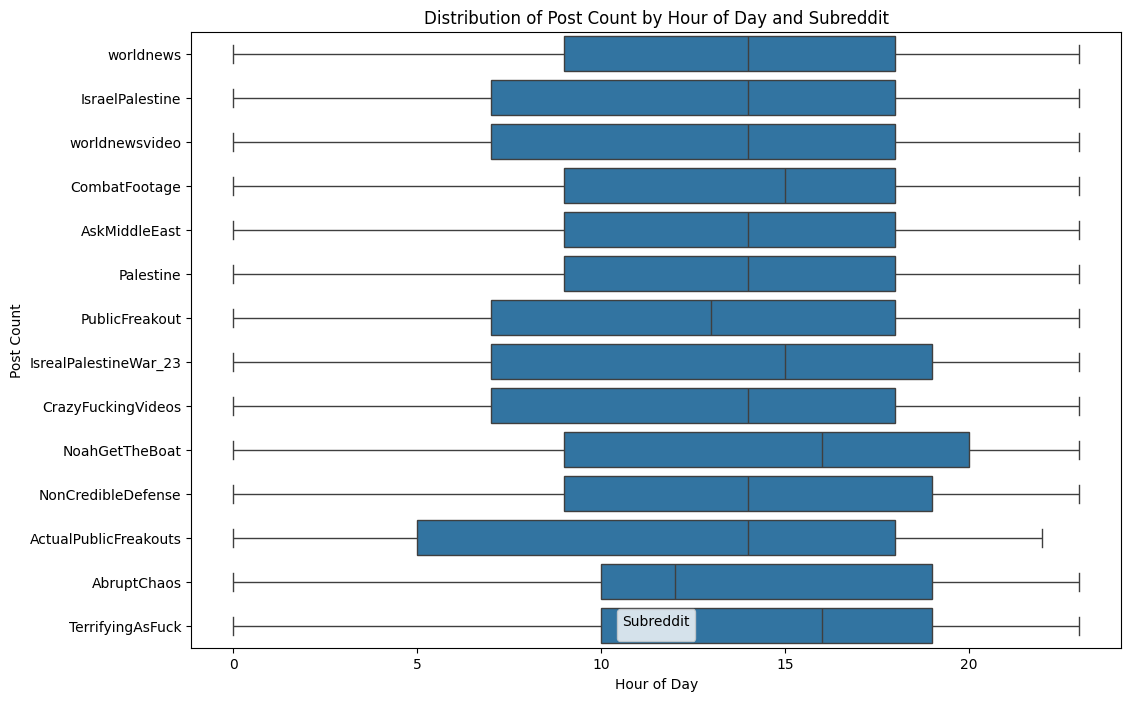

In [ ]:

# Step 1: Prepare the data
# Extract the hour from 'post_created_time'
df['post_created_hour'] = df['post_created_time'].dt.hour

# Step 2: Aggregate the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='post_created_hour', y='subreddit')
plt.title('Distribution of Post Count by Hour of Day and Subreddit')
plt.xlabel('Hour of Day')
plt.ylabel('Post Count')
plt.legend(title='Subreddit')
plt.show()


In [ ]:
'post_count' in df.columns

False

In [ ]:
# Group by 'subreddit' and 'post_created_hour' and count the number of posts
grouped_df = df.groupby(['subreddit', 'post_created_hour']).size().reset_index(name='post_count')

# Step 3: Generate the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color map
colors = plt.cm.jet(np.linspace(0, 1, len(grouped_df['subreddit'].unique())))

# Plot each subreddit with a different color
for i, subreddit in enumerate(grouped_df['subreddit'].unique()):
    subset = grouped_df[grouped_df['subreddit'] == subreddit]
    ax.bar(subset['post_created_hour'], subset['post_count'], zs=i, zdir='y', alpha=0.8, label=subreddit)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Subreddit')
ax.set_zlabel('Number of Posts')
ax.set_yticks(range(len(grouped_df['subreddit'].unique())))
ax.set_yticklabels(grouped_df['subreddit'].unique())

plt.title('3D Distribution of Post Creation Times by Subreddit')
plt.legend()
plt.show()

In [ ]:
# Step 1: Calculate total controversiality and total number of comments per post
grouped_df = df.groupby('time_difference_minutes').agg(total_controversiality=('controversiality', 'sum'),
                                       total_comments=('comment_id', 'count')).reset_index()
grouped_df.total_controversiality.max()

13

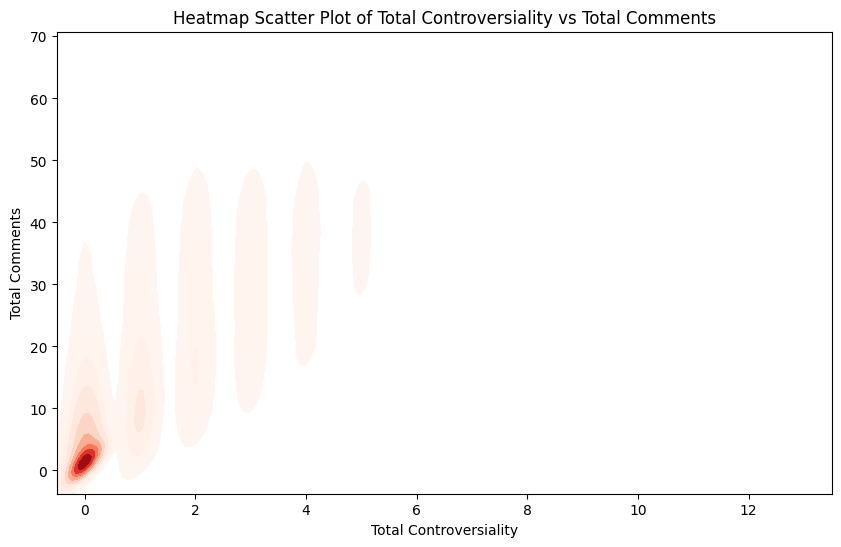

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouped_df, x='total_controversiality', y='total_comments', cmap="Reds", fill=True)
plt.title('Heatmap Scatter Plot of Total Controversiality vs Total Comments')
plt.xlabel('Total Controversiality')
plt.ylabel('Total Comments')
plt.show()

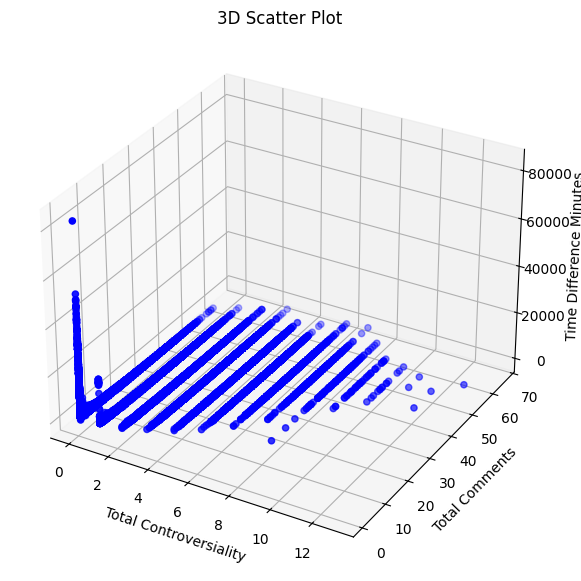

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(grouped_df['total_controversiality'], grouped_df['total_comments'], grouped_df['time_difference_minutes'], c='blue', marker='o')

ax.set_xlabel('Total Controversiality')
ax.set_ylabel('Total Comments')
ax.set_zlabel('Time Difference Minutes')
# ax.set_zscale('log')
plt.title('3D Scatter Plot')
plt.show()


In [ ]:

# Step 2: Convert total controversiality into a categorical label

def controversiality_label(x):
    if x == 0:
        return 'Non-Controversial'
    elif 0 < x <= 10:
        return 'Mildly Controversial'
    elif 10 < x <= 20:
        return 'Moderately Controversial'
    else:
        return 'Highly Controversial'

grouped_df['total_controversiality_label'] = grouped_df['total_controversiality'].apply(controversiality_label)

# Assuming there's a way to map each post_id back to its time_difference_minutes
# For simplicity, let's assume df has a column 'time_difference_minutes' for each comment, and we take the max as the post's time
# post_time_difference = df.groupby('post_id')['time_difference_minutes'].max().reset_index()

# Merge to get a DataFrame with post_id, total_controversiality_label, and time_difference_minutes
# final_df = pd.merge(grouped_df, post_time_difference, on='post_id')

def comments_label(x):
    if x == 0:
        return 'No Comments'
    elif 0 < x <= 10:
        return '1-10 Comments'
    elif 10 < x <= 20:
        return '11-20 Comments'
    elif 20 < x <= 30:
        return '21-30 Comments'
    elif 30 < x <= 40:
        return '31-40 Comments'
    elif 40 < x <= 50:
        return '41-50 Comments'
    else:
        return 'More than 50 Comments'

grouped_df['comments_label'] = grouped_df['total_comments'].apply(comments_label)
# Step 4: Generate a box plot


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='comments_label', y='time_difference_minutes', data=grouped_df)
plt.title('Time Difference Minutes by Total Comments')
plt.xlabel('Total Comments')
plt.ylabel('Time Difference (minutes)')
plt.yscale('log')
plt.show()


In [ ]:

sns.boxplot(x='total_controversiality_label', y='time_difference_minutes', data=grouped_df)
plt.title('Time Difference Minutes by Total Controversiality Label')
plt.xlabel('Total Controversiality Label')
plt.ylabel('Time Difference (minutes)')
plt.yscale('log')
plt.show()

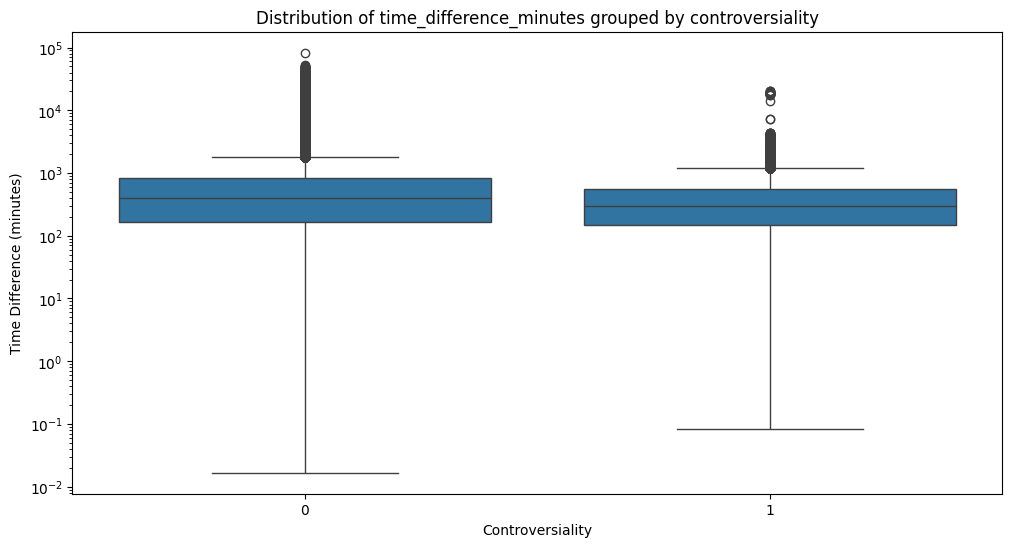

In [ ]:
# Create a box plot with log scale y-axis
plt.figure(figsize=(12, 6))
sns.boxplot(x='controversiality', y='time_difference_minutes', data=df)
plt.title('Distribution of time_difference_minutes grouped by controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Time Difference (minutes)')
plt.yscale('log')
plt.show()


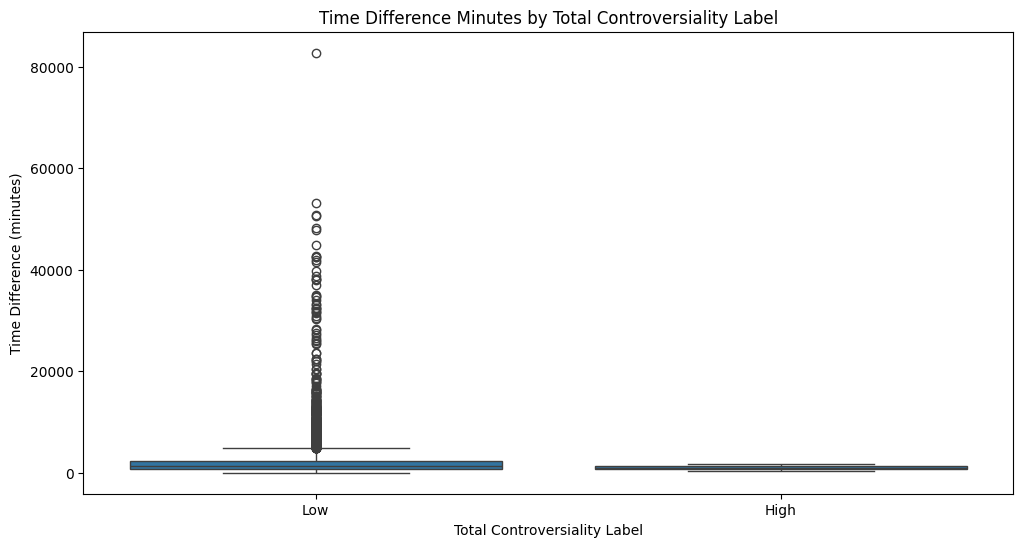

In [ ]:
# Step 1: Calculate total controversiality and total number of comments per post
grouped_df_temp = df.groupby('post_id').agg(total_controversiality=('controversiality', 'sum'),
                                       total_comments=('comment_id', 'count')).reset_index()

# Step 2: Convert total controversiality into a categorical label
def controversiality_label(x):
    if x > 10:  # Example threshold, adjust based on your data
        return 'High'
    else:
        return 'Low'

grouped_df_temp['total_controversiality_label'] = grouped_df['total_controversiality'].apply(controversiality_label)

# Assuming there's a way to map each post_id back to its time_difference_minutes
# For simplicity, let's assume df has a column 'time_difference_minutes' for each comment, and we take the max as the post's time
post_time_difference = df.groupby('post_id')['time_difference_minutes'].max().reset_index()

# Merge to get a DataFrame with post_id, total_controversiality_label, and time_difference_minutes
final_df = pd.merge(grouped_df_temp, post_time_difference, on='post_id')

# Step 4: Generate a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_controversiality_label', y='time_difference_minutes', data=final_df)
plt.title('Time Difference Minutes by Total Controversiality Label')
plt.xlabel('Total Controversiality Label')
plt.ylabel('Time Difference (minutes)')
plt.show()
del grouped_df_temp, post_time_difference, final_df

In [ ]:

# Bin the 'time_difference' into categories
# bins = [0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Example bins, adjust as necessary
# labels = ['0-1d', '1-2d', '2-3d', '3-4d', '4-5d', '5-10d', '10-20d', '20-30d', '30-40d', '40-50d', '50-60d', '60-70d', '70-80d', '80-90d', '90-100d']
# bins = [0, 1, 2, 3, 4, 5, 6, 12, 18, 24, 48, 72, 96]
# labels = ['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '5-6h', '6-12h', '12-18h', '18-24h', '24-48h', '48-72h', '72-96h']
bins = [i for i in range(0, 100, 1)]
labels = [str(i) + '-' + str(i + 1) + 'h' for i in range(0, 99, 1)]
print(labels)

['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '5-6h', '6-7h', '7-8h', '8-9h', '9-10h', '10-11h', '11-12h', '12-13h', '13-14h', '14-15h', '15-16h', '16-17h', '17-18h', '18-19h', '19-20h', '20-21h', '21-22h', '22-23h', '23-24h', '24-25h', '25-26h', '26-27h', '27-28h', '28-29h', '29-30h', '30-31h', '31-32h', '32-33h', '33-34h', '34-35h', '35-36h', '36-37h', '37-38h', '38-39h', '39-40h', '40-41h', '41-42h', '42-43h', '43-44h', '44-45h', '45-46h', '46-47h', '47-48h', '48-49h', '49-50h', '50-51h', '51-52h', '52-53h', '53-54h', '54-55h', '55-56h', '56-57h', '57-58h', '58-59h', '59-60h', '60-61h', '61-62h', '62-63h', '63-64h', '64-65h', '65-66h', '66-67h', '67-68h', '68-69h', '69-70h', '70-71h', '71-72h', '72-73h', '73-74h', '74-75h', '75-76h', '76-77h', '77-78h', '78-79h', '79-80h', '80-81h', '81-82h', '82-83h', '83-84h', '84-85h', '85-86h', '86-87h', '87-88h', '88-89h', '89-90h', '90-91h', '91-92h', '92-93h', '93-94h', '94-95h', '95-96h', '96-97h', '97-98h', '98-99h']


In [ ]:
df['time_difference_binned'] = pd.cut(df['time_difference_hours'], bins=bins + [df['time_difference_hours'].max()], labels=labels + ['> ' + str(bins[-1])], right=False)
# labels = ['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '5-6h', '6-24h', '24-48h', '48-72h', '72-96h']
# labels = ['0-1h', '1-2h', '2-3h', '3-4h', '4-5h', '5-6h', '6-24h']
# df['time_difference_binned'] = pd.cut(df['time_difference_hours'], bins=bins, labels=labels, right=False)
# Calculate the number of comments for each post_id binning on the time_difference
df['number_of_comments'] = df.groupby(['post_id', 'time_difference_binned'])['comment_id'].transform('count')

# Group by 'post_id' and 'time_difference_binned' and calculate the number of comments
grouped = df.groupby(['post_id', 'time_difference_binned'])['number_of_comments'].sum().reset_index()


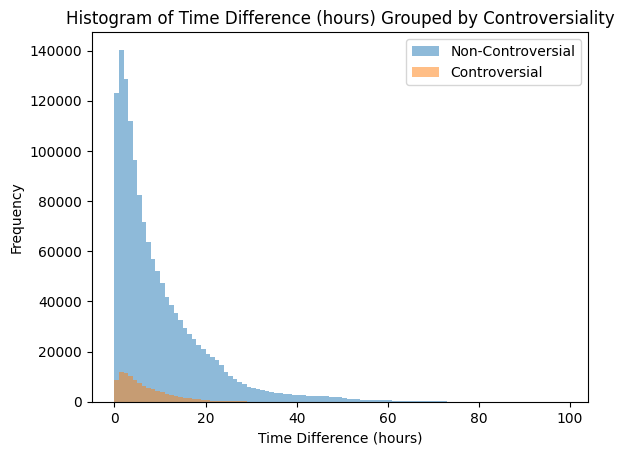

In [ ]:

# plt.hist(df['time_difference_hours'], bins=1000)
# plt.title('Histogram of Time Difference (hours)')
# plt.xlabel('Time Difference (hours)')
# plt.ylabel('Frequency')
# plt.xscale('log')
# plt.show()
bins = [i for i in range(0, 100, 1)]
plt.hist(df[df['controversiality'] == 0]['time_difference_hours'], bins=bins, alpha=0.5, label='Non-Controversial')
plt.hist(df[df['controversiality'] == 1]['time_difference_hours'], bins=bins, alpha=0.5, label='Controversial')
plt.title('Histogram of Time Difference (hours) Grouped by Controversiality')
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:

# Pivot for boxplot
pivot_df = grouped.pivot(index='post_id', columns='time_difference_binned', values='number_of_comments')

# Plot
ax = pivot_df.plot(kind='box', figsize=(12, 6))
plt.title('Distribution of Number of Comments Across Post ID by Binned Time Difference')
plt.ylabel('Number of Comments')
plt.xlabel('Time Difference Bins')
plt.xticks(rotation=45)

# Calculate and display the interquartile range and median for each time difference bin
medians = pivot_df.median()
q1 = pivot_df.quantile(0.25)
q3 = pivot_df.quantile(0.75)
iqr = q3 - q1

# Create a table with the statistics
table_data = pd.DataFrame({'Median': medians, 'Q1': q1, 'Q3': q3, 'IQR': iqr})
table_data.index.name = 'Time Difference Bins'
display(table_data)

plt.show()

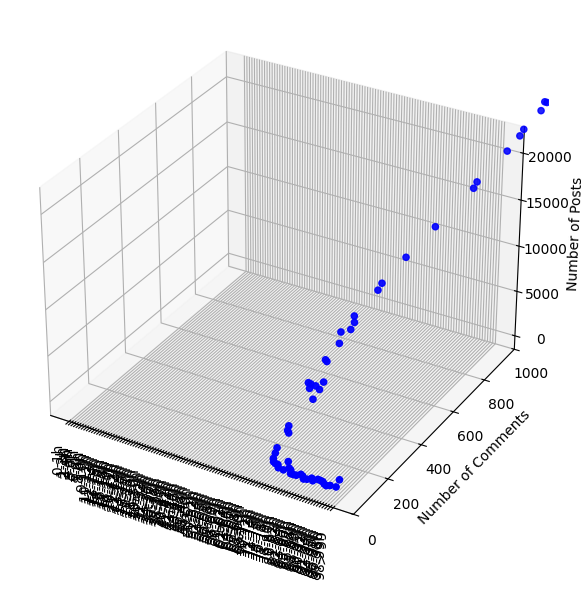

In [ ]:
# Step 1: Count unique 'comment_id' for each 'time_difference_binned'
comments_count = df.groupby('time_difference_binned')['comment_id'].nunique().reset_index(name='number_of_comments')

# Step 2: Count unique 'post_id' for each 'time_difference_binned'
posts_count = df.groupby('time_difference_binned')['post_id'].nunique().reset_index(name='number_of_posts')

# Step 3: Merge the two results
merged_df = pd.merge(comments_count, posts_count, on='time_difference_binned')

# Convert 'time_difference_binned' to a categorical type and then to numeric for plotting
merged_df['time_difference_binned'] = pd.Categorical(merged_df['time_difference_binned'])
merged_df['time_difference_binned_code'] = merged_df['time_difference_binned'].cat.codes

# Step 4: Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.scatter(merged_df['time_difference_binned_code'], merged_df['number_of_comments'], merged_df['number_of_posts'], c='blue', marker='o')

ax.set_xlabel('Time Difference Bins')
ax.set_ylabel('Number of Comments')
ax.set_zlabel('Number of Posts')
ax.set_ylim(0, 1000)
ax.set_xticklabels(merged_df['time_difference_binned'], rotation=90)
# Customizing the x-axis to show bin labels instead of codes
ax.set_xticks(merged_df['time_difference_binned_code'])
ax.set_xticklabels(merged_df['time_difference_binned'])

plt.show()

In [ ]:
# Step 2: Group by 'time_difference_binned' and 'post_id', then count unique 'comment_id' for each group
df_grouped = df.groupby(['time_difference_binned', 'post_id']).agg({'comment_id': 'nunique', 'controversiality': 'sum'}).reset_index()
df_grouped_filtered = df_grouped[df_grouped['comment_id'] != 0]

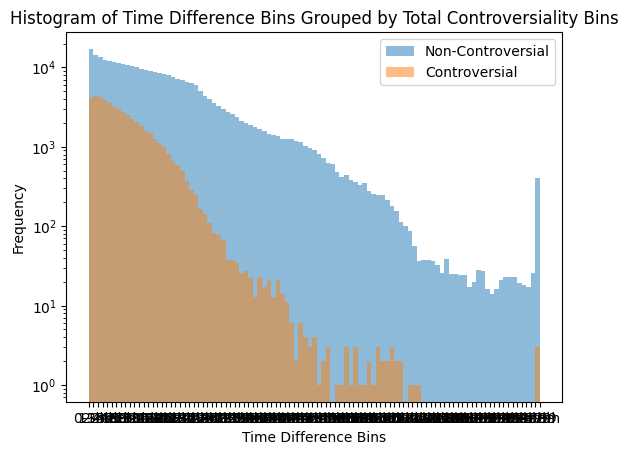

In [ ]:
# Create a function to assign controversiality bins
def controversiality_bins(x):
    if x == 0:
        return '0'
    else:
        return '>0'

# Apply the function to create the controversiality_bins column

df_grouped_filtered['total_controversiality_bins'] = df_grouped_filtered['controversiality'].apply(controversiality_bins)
bins = [i for i in range(0, 100, 1)]
plt.hist(df_grouped_filtered[df_grouped_filtered['total_controversiality_bins'] == '0']['time_difference_binned'], bins=bins, alpha=0.5, label='Non-Controversial')
plt.hist(df_grouped_filtered[df_grouped_filtered['total_controversiality_bins'] == '>0']['time_difference_binned'], bins=bins, alpha=0.5, label='Controversial')
# plt.hist(df['time_difference_binned'], bins=bins, alpha=0.5, label='Time Difference Bins')
plt.xlabel('Time Difference Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Time Difference Bins Grouped by Total Controversiality Bins')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
# Step 3: Now, count the number of unique 'post_id' within each 'time_difference_binned' category
# This gives us the number of unique posts with comments in each time difference bin
posts_with_comments_count = df_grouped_filtered.groupby('time_difference_binned')['post_id'].nunique()
posts_comments_count = df_grouped.groupby('time_difference_binned').agg({'post_id': 'nunique', 'comment_id': 'sum'}).reset_index()
posts_comments_count.columns = ['Time Difference Binned', 'Number of Posts', 'Number of Comments']
# posts_comments_count
posts_with_comments_count

Text(0, 0.5, 'Number of Unique Posts with Comments')

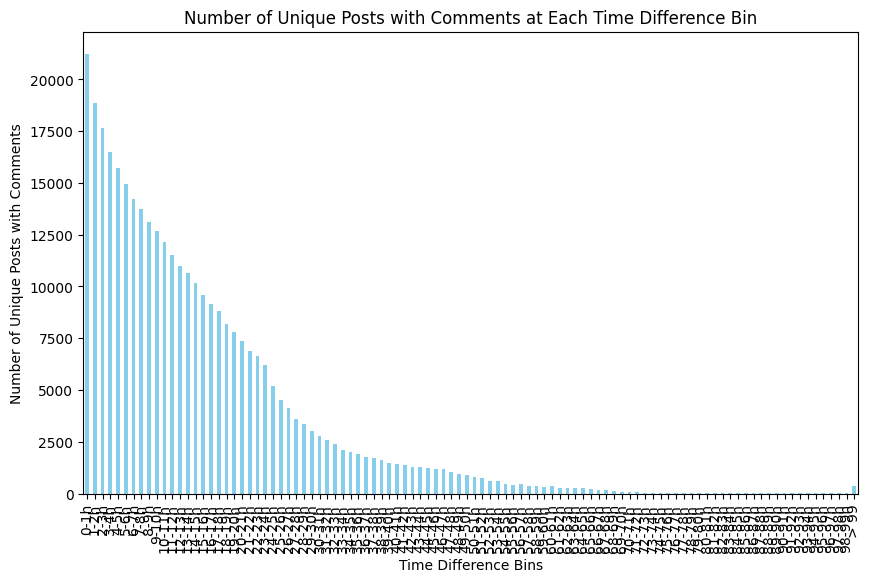

In [ ]:

# filtered_posts_comments_count
# # Step 4: Plot
posts_with_comments_count.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Unique Posts with Comments at Each Time Difference Bin')
plt.xlabel('Time Difference Bins')
plt.ylabel('Number of Unique Posts with Comments')


## Bypass

In [ ]:
# exclude_cols = ['post_self_text', 'post_title', 'self_text', 'clean_text', 'clean_post_self_text']
# included_cols = [col for col in df.columns if col not in exclude_cols]
# print(len(included_cols), included_cols)
# df_no_text = df[included_cols]
# df_no_text.to_csv("/content/drive/MyDrive/Dissertation/Dataset/reddit_opinion_PSE_ISR_no_text.csv")
# prompt: when are values in post_id equal to values in comment_id column in the dataframe ?

equal_values = df_no_text[df_no_text['post_id'] == df_no_text['comment_id']]
if len(equal_values) > 0:
  print(f"There are {len(equal_values)} rows where post_id and comment_id are equal.")
  # Display the rows
  display(equal_values)
else:
  print("There are no rows where post_id and comment_id are equal.")

# Get number of unique comment_id in df_no_text
# num_unique_posts = df_no_text['comment_id'].nunique()
# print(num_unique_posts)
# print(df_no_text.count())
# Plot histogram of comment_id
# plt.figure(figsize=(10, 6))
# plt.hist(df_no_text['comment_id'], bins=100)
# plt.xlabel('Comment ID')
# plt.ylabel('Frequency')
# plt.title('Histogram of Comment IDs')
# plt.show()

df.shape
df.columns
df.head()
df.dtypes

NameError: name 'df_no_text' is not defined

## ***Changing wrong data types***

### ***Cleaning text columns for better analysis (Bypass)***

In [ ]:
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove HTML tags
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()

        # Remove special characters and lowercase the text
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

        # Tokenization
        tokens = word_tokenize(text)

        # Lemmatization and removing stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

        # Join the tokens back into a sentence
        cleaned_text = ' '.join(tokens)

        return cleaned_text
    else:
        return ''  # Return an empty string for non-string values


# usage on 'self_text' column
# df['clean_text'] = df['self_text'].apply(clean_text)

# df.to_csv(r"C:\Users\tomar\Documents\Sheffield Sem 2\Research And Dissertation Preparation\Final_Dissertation\DataSet\reddit_opinion_PSE_ISR_cleaned_1.csv")

In [ ]:
# without Initialize the lemmatizer and stopwords {self_text} column
for i in range(15):
    print(df.self_text[i])
# with Initialize the lemmatizer and stopwords for self_text column
for i in range(15):
    print(df.clean_text[i])
# usage on 'post_self_text' column
df['clean_post_self_text'] = df['post_self_text'].apply(clean_text)
# without Initialize the lemmatizer and stopwords post_self_text column
for i in range(15):
    print(df.post_self_text[i])
# with Initialize the lemmatizer and stopwords post_self_text column
for i in range(15):
    print(df.clean_post_self_text[i])

## ***Select data(posts+comments) starting from '2023-10-07'***

In [ ]:
print('Len. of data before 2023-10-07:' ,len(df))
start_date = pd.to_datetime('2023-10-07')

# data(posts+comments) starting from '2023-10-07'
filtered_df = df[(df['post_created_time'] >= start_date) & (df['created_time'] >= start_date)]
print('Len. of data After 2023-10-07:',len(filtered_df))
print('Num. of dropped rows:',len(df)-len(filtered_df))

Len. of data before 2023-10-07: 1547486
Len. of data After 2023-10-07: 1544785
Num. of dropped rows: 2701


In [ ]:
# Get total number of missing values for all the dataset
filtered_df.isnull().sum().sum()

1805025

In [ ]:
filtered_df.isnull().sum()

Unnamed: 0                         0
comment_id                         0
score                              0
self_text                          7
subreddit                          0
created_time                       0
post_id                            0
author_name                        0
controversiality                   0
ups                                0
downs                              0
user_is_verified                   0
user_account_created_time      61633
user_awardee_karma               215
user_awarder_karma               215
user_link_karma                  215
user_comment_karma               215
user_total_karma                 215
post_score                         0
post_self_text                859237
post_title                         0
post_upvote_ratio                  0
post_thumbs_ups                    0
post_total_awards_received         0
post_created_time                  0
clean_text                     14667
clean_post_self_text          868406
d

## Bypass

***The post_self_text column contains the most null values,but This doesn't necessarily mean posts lack content; it's due to the dataset structure where post details get repeated for each comment.***

***See the dublicated data***

In [ ]:
# Check the dublicated posts in dataset
print(f" Duplicate Posts: {filtered_df[['post_title','post_self_text']].duplicated().sum()}")

In [ ]:
# Check the dublicated comments in dataset
print(f'Duplicate Comments: {filtered_df[["self_text"]].duplicated().sum()}')

> **However there are many duplicated values, but we can't remove all of them. Perhaps it will affect the results, due to many people can share the same post or have the same agreement in the comment.**

***show the most duplicated values***

In [ ]:
#show the most duplicated values in posts
df_duplicated_postss = filtered_df[filtered_df.duplicated(subset=['post_self_text'])]
post_self_text_countss = df_duplicated_postss['post_self_text'].value_counts().reset_index()
post_self_text_countss.columns = ['post_self_text', 'count']
post_self_text_countss.head(15)

In [ ]:
#show the most duplicated values in comments
df_duplicated_comments= filtered_df[filtered_df.duplicated(subset=['self_text'])]
self_text_counts = df_duplicated_comments['self_text'].value_counts().reset_index()
self_text_counts.columns = ['self_text', 'count']
self_text_counts.head(15)

# Multi Processing in Pandas

In [ ]:

def _apply_df(args):
    df, func, num, kwargs = args
    return num, df.progress_apply(func, **kwargs)

def apply_by_multiprocessing(df,func,**kwargs):
  workers=kwargs.pop('workers')
  pool = multiprocessing.Pool(processes=workers)
  result = pool.map(_apply_df, [(d, func, i, kwargs) for i,d in enumerate(np.array_split(df, workers))])
  pool.close()
  result=sorted(result,key=lambda x:x[0])
  return pd.concat([i[1] for i in result])

# def square(x):
#     return x**x

# if __name__ == '__main__':
#     df = pd.DataFrame({'a':range(10), 'b':range(10)})
#     apply_by_multiprocessing(df, square, axis=1, workers=4)

# Sentiment analysis


> Some reddit posts can only have a post title and a photo or video. This could be useful for identifying posts.

In [ ]:
# %load_ext cudf.pandas
# %reload_ext cudf.pandas


In [ ]:
# import cudf
print(pd)

<module 'pandas' from 'c:\\Users\\tomar\\Documents\\Sheffield Sem 2\\Research And Dissertation Preparation\\Final_Dissertation\\Codes\\wpipvenv\\Lib\\site-packages\\pandas\\__init__.py'>


## 1. Roberta Sentiment Analysis  

In [ ]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def get_Roberta_Sentiment(text):
    # ipdb.set_trace()
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    # print(scores)
    scores = softmax(scores)
    sentiment_dict = {0: 'neg', 1: 'neu', 2: 'pos'}
    sentiment = sentiment_dict[np.where(scores==scores.max())[0][0]]
    out = {'neg': scores[0], 'neu': scores[1], 'pos': scores[2], 'sentiment': sentiment}
    out_tuple = (out['neg'], out['neu'], out['pos'], out['sentiment'])
    if len(out_tuple) == 4:
        return out_tuple
    else:
      ipb.set_trace()
get_Roberta_Sentiment('Sun rises in the east, and the sun sets in the west.')

(0.00528834, 0.6065087, 0.388203, 'neu')

### 1.1 Roberta Post Sentiment Analysis

In [ ]:
df_col, display_name =  'post_title','Post_Sentiment'
post_sentiment_filtered_df=filtered_df[(~filtered_df[df_col].isna())]
# Remove duplicate values from the df_col column , as the one post may be duplicated as it has many comments
start_time_1 = time.monotonic()
post_sentiment_filtered_df = post_sentiment_filtered_df.drop_duplicates(subset=[df_col])
end_time_1 = time.monotonic()
print(f"Time taken to drop duplicates: {timedelta(seconds=end_time_1 - start_time_1)}")
# Calc sentiment score for each record
# post_sentimenet_filtered_df['post_sentiment'] = post_sentimenet_filtered_df[df_col].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
# post_sentimenet_filtered_df['post_sentiment_category'] = post_sentimenet_filtered_df['post_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
start_time_2 = time.monotonic()
psdf = post_sentiment_filtered_df
psdf['post_title_rbrt_neg'],psdf['post_title_rbrt_neu'],\
psdf['post_title_rbrt_pos'],psdf['post_title_rbrt_sent'] = psdf[df_col].progress_apply(get_Roberta_Sentiment)
end_time_2 = time.monotonic()
print(f"Time taken to get roberta sentiments: {timedelta(seconds=end_time_2 - start_time_2)}")
# Count the occurrences of each sentiment category
sentiment_counts = psdf['rbrt_sent'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = [display_name, 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')


In [ ]:

post_self_text_filtered_df = filtered_df[(~filtered_df['clean_post_self_text'].isna())]
# Remove duplicate values from the 'post_title' column , as the one post may be duplicated as it has many comments
post_self_text_filtered_df = post_self_text_filtered_df.drop_duplicates(subset=['post_title'])

# Calc sentiment score for each record
pstfd = post_self_text_filtered_df
pstfd['post_text_rbrt_neg'], pstfd['post_text_rbrt_neu'],\
pstfd['post_text_rbrt_pos'],pstfd['post_text_rbrt_sent'] = pstfd['clean_post_self_text'].progress_apply(get_Roberta_Sentiment)


# Count the occurrences of each sentiment category
sentiment_counts = pstfd['post_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Post_Sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

### Roberta Comment Sentiment Analysis

In [ ]:
df_col, display_name =  'clean_text','Comment_Sentiment'
#TODO generalize the variable, post_sentimen_filtered_df
post_sentiment_filtered_df=filtered_df[(~filtered_df[df_col].isna())]
# Remove duplicate values from the df_col column , as the one post may be duplicated as it has many comments
start_time_1 = time.monotonic()
post_sentiment_filtered_df = post_sentiment_filtered_df.drop_duplicates(subset=[df_col])
end_time_1 = time.monotonic()
print(f"Time taken to drop duplicates: {timedelta(seconds=end_time_1 - start_time_1)}")
# Calc sentiment score for each record
# post_sentimenet_filtered_df['post_sentiment'] = post_sentimenet_filtered_df[df_col].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
# post_sentimenet_filtered_df['post_sentiment_category'] = post_sentimenet_filtered_df['post_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
start_time_2 = time.monotonic()
psdf = post_sentiment_filtered_df
psdf['cmt_rbrt_neg'],psdf['cmt_rbrt_neu'],psdf['cmt_rbrt_pos'],psdf['cmt_rbrt_sent']  = psdf[df_col].progress_apply(get_Roberta_Sentiment)
end_time_2 = time.monotonic()
print(f"Time taken to get roberta sentiments: {timedelta(seconds=end_time_2 - start_time_2)}")
# Count the occurrences of each sentiment category
sentiment_counts = psdf['rbrt_sent'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = [display_name, 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

## 2. TextBlob Sentiment Analysis

### 2.1 TextBlob Post Title sentiment analysis

In [ ]:
import dask_expr as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

In [ ]:
def get_tb_sentiment_polarity(text):
    return TextBlob(str(text)).sentiment.polarity
def get_tb_sentiment(polarity: str) -> float:
    value = 'Positive'
    if polarity > 0:
        value = 'Positive'
    elif polarity < 0:
        value = 'Negative'
    else:
        value = 'Neutral'
    return value

In [ ]:
filtered_df = df
post_sentiment_filtered_df=filtered_df[(~filtered_df['post_title'].isna())]
# Remove duplicate values from the 'post_title' column , as the one post may be duplicated as it has many comments
post_sentiment_filtered_df = post_sentiment_filtered_df.drop_duplicates(subset=['post_id'])

# Calc sentiment score for each record
# ds = dd.from_pandas(post_sentiment_filtered_df, npartitions=12)

# res = ds.map_partitions()
# res = ds.map_partitions(lambda df: df.assign(post_sentiment= get_tb_sentiment_polarity(ds.post_title)))
# Assign sentiment category based on sentiment score

# res = res.map_partitions(
#     lambda df: df.assign(
#         post_sentiment_category = get_tb_sentiment(df.post_sentiment)),
#     meta = {'post_sentiment_category': 'str'}
#     )

# res.head(1)
# res = ds.map_partitions()
# post_sentiment_filtered_df['post_sentiment'] = apply_by_multiprocessing(df=post_sentiment_filtered_df['post_title'], func = get_tb_sentiment_polarity, workers=12)
# Assign sentiment category based on sentiment score
# post_sentiment_filtered_df['post_sentiment_category'] = apply_by_multiprocessing(df= post_sentiment_filtered_df['post_sentiment'], func= get_tb_sentiment, workers=12)

# Post sentiment using simple apply, TextBlob
post_sentiment_filtered_df['post_title_tb_sval'] = post_sentiment_filtered_df['post_title'].progress_apply(lambda x: TextBlob(str(x)).sentiment.polarity)
post_sentiment_filtered_df['post_title_tb_cat'] = post_sentiment_filtered_df['post_title_tb_sval'].progress_apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


  0%|          | 0/28571 [00:00<?, ?it/s]

  0%|          | 0/28571 [00:00<?, ?it/s]

### 2.2 Text Blob post self text sentiment analysis

In [ ]:
post_self_text_filtered_df = post_sentiment_filtered_df
post_self_text_filtered_df = post_self_text_filtered_df[(~
    post_self_text_filtered_df['clean_post_self_text'].isna()
)]
# post_self_text_filtered_df = filtered_df[(~filtered_df['clean_post_self_text'].isna())]

# Calc sentiment score for each record
post_self_text_filtered_df['post_text_tb_sval'] = post_self_text_filtered_df['clean_post_self_text'].progress_apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# Assign sentiment category based on sentiment score
post_self_text_filtered_df['post_text_tb_cat'] = post_self_text_filtered_df['post_text_tb_sval'].progress_apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


  0%|          | 0/9564 [00:00<?, ?it/s]

  0%|          | 0/9564 [00:00<?, ?it/s]

### 2.3 TextBlob Comments sentiment analysis

In [ ]:
sentiment_filtered_df=df[(~df['clean_text'].isna())]
sentiment_filtered_df = sentiment_filtered_df.drop_duplicates(subset=['clean_text'])

sentiment_filtered_df['comment_tb_sval'] = sentiment_filtered_df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
sentiment_filtered_df['comment_tb_cat'] = sentiment_filtered_df['comment_tb_sval'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [ ]:
post_sentiment_filtered_df.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat'],
      dtype='object')

In [ ]:
# Join the dataframes
common_columns = list(set(df.columns) & set(post_sentiment_filtered_df.columns))
common_columns.remove('comment_id')

df_merged = df.merge(post_sentiment_filtered_df.drop(columns=common_columns),
                    on='comment_id', how='outer')
common_columns = list(set(df_merged.columns) & set(post_self_text_filtered_df.columns))
common_columns.remove('comment_id')
df_merged = df_merged.merge(post_self_text_filtered_df.drop(columns=common_columns),
                            on='comment_id', how='outer')

In [ ]:
df_merged.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat',
       'post_text_tb_sval', 'post_text_tb_cat'],
      dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat',
       'post_text_tb_sval', 'post_text_tb_cat', 'comment_tb_sval',
       'comment_tb_cat'],
      dtype='object')

In [ ]:
common_columns = list(set(df_merged.columns) & set(sentiment_filtered_df.columns))
common_columns.remove('comment_id')

df_merged = df_merged.merge(sentiment_filtered_df.drop(columns=common_columns),
                            on='comment_id', how='outer')
df_merged.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat',
       'post_text_tb_sval', 'post_text_tb_cat', 'comment_tb_sval',
       'comment_tb_cat'],
      dtype='object')

# Ishan EDA

<Figure size 1000x600 with 0 Axes>

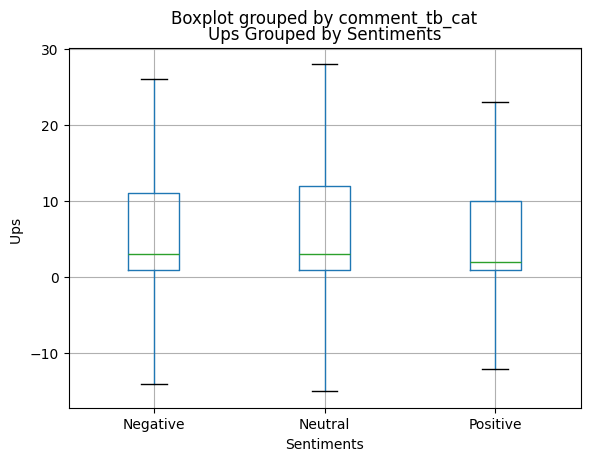

In [ ]:
plt.figure(figsize=(10, 6))
df_merged.boxplot(column='ups', by='comment_tb_cat', showfliers=False)
plt.title("Ups Grouped by Sentiments")
plt.xlabel("Sentiments")
plt.ylabel("Ups ")
# plt.xticks([1, 2], ['Non-Controversial', 'Controversial'])
plt.show()


<Figure size 1000x600 with 0 Axes>

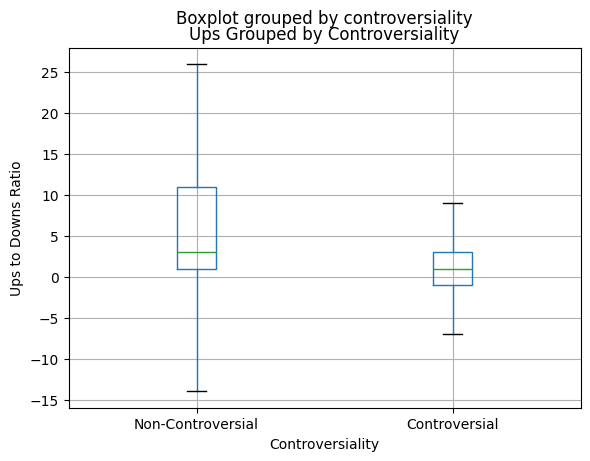

In [ ]:
plt.figure(figsize=(10, 6))
df_merged.boxplot(column='ups', by=['controversiality'], showfliers=False)
plt.title("Ups Grouped by Controversiality")
plt.xlabel("Controversiality")
plt.ylabel("Ups to Downs Ratio")
plt.xticks([1, 2], ['Non-Controversial', 'Controversial'])
plt.show()

In [ ]:

plt.title("Ups to Downs Ratio Grouped by Controversiality")
plt.xlabel("Controversiality")
plt.ylabel("Ups to Downs Ratio")
plt.xticks([1, 2], ['Non-Controversial', 'Controversial'])
plt.show()

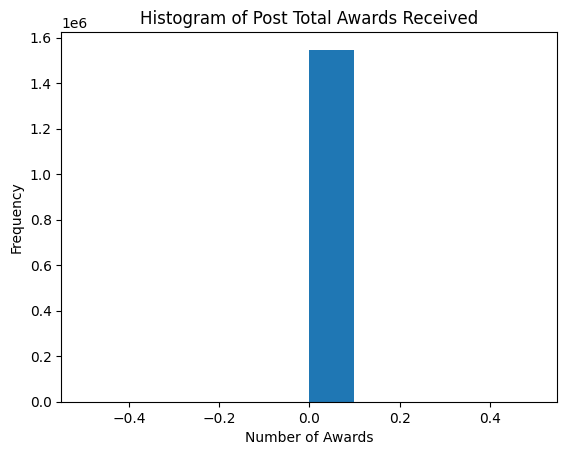

In [ ]:
# Generate total awards histogram
plt.hist(df_merged['post_total_awards_received'], bins=10)
plt.xlabel('Number of Awards')
plt.ylabel('Frequency')
plt.title('Histogram of Post Total Awards Received')
plt.show()

In [ ]:
#
same_post_thumbs_up = df_merged.groupby('post_id')['post_thumbs_ups'].nunique().eq(1).all()
print(same_post_thumbs_up)
#
# numpy.nan_to_num
# Calculate the ratio of Positive and Negative for each unique post_id
ratio = df_merged.groupby('post_id')['comment_tb_cat'].apply(lambda x: (x == 'Positive').sum() / (x == 'Negative').sum())
ratio = ratio.reset_index()
# ratio['post_thumbs_ups'] =
thumbs_ups = df_merged.groupby('post_id')['post_thumbs_ups'].first()
ratio_merged = ratio.merge(thumbs_ups, on='post_id')
plt.figure(figsize=(12, 6))
sns.kdeplot(data=ratio_merged, y='comment_tb_cat', x='post_thumbs_ups', cmap="Reds", fill=True)
plt.title('Heatmap Scatter Plot of Positive/Negative sentiment ratio vs Post Thumbs Ups')
plt.xlabel('Post Thumbs Ups')
plt.ylabel('Postive/Negative Sentiment Ratio')
plt.xlim(0, 10000)
plt.show()

True

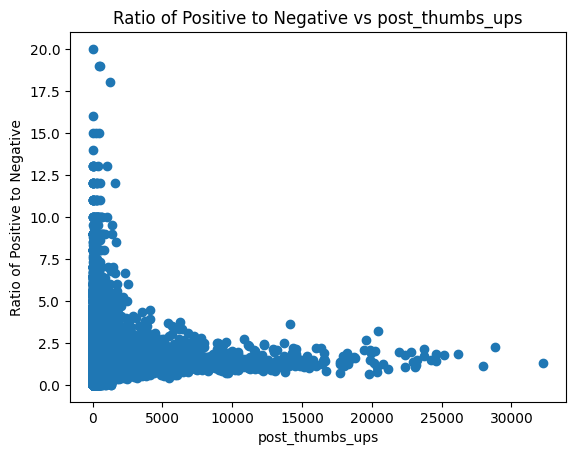

In [ ]:

# Generate scatter plot
plt.scatter(ratio_merged['post_thumbs_ups'], ratio_merged['comment_tb_cat'])
plt.xlabel('post_thumbs_ups')
plt.ylabel('Ratio of Positive to Negative')
plt.title('Ratio of Positive to Negative vs post_thumbs_ups')
plt.show()

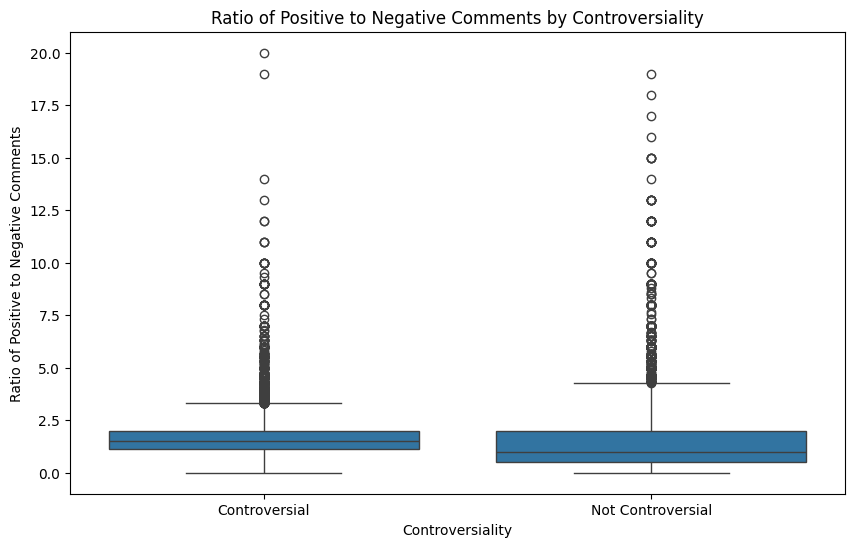

In [ ]:
# Step 1: Calculate total controversiality for each post_id
total_controversiality = df_merged.groupby('post_id')['controversiality'].sum().reset_index()

# Step 2: Calculate the ratio of Positive to Negative classes in comment_tb_cat
# First, count the occurrences of each category for each post_id
category_counts = df_merged.groupby(['post_id', 'comment_tb_cat']).size().unstack(fill_value=0)

# Calculate the ratio of Positive to Negative, handling division by zero
category_counts['Pos_Neg_Ratio'] = category_counts['Positive'] / category_counts['Negative'].replace(0, 1)

# Step 3: Label the total controversiality
total_controversiality['Controversial_Label'] = total_controversiality['controversiality'].apply(lambda x: 'Not Controversial' if x == 0 else 'Controversial')

# Merge the ratio back into the total controversiality DataFrame
final_df = pd.merge(total_controversiality, category_counts['Pos_Neg_Ratio'], on='post_id')

# Step 4: Generate a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Controversial_Label', y='Pos_Neg_Ratio', data=final_df)
plt.title('Ratio of Positive to Negative Comments by Controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Ratio of Positive to Negative Comments')
plt.show()

<Figure size 2000x800 with 0 Axes>

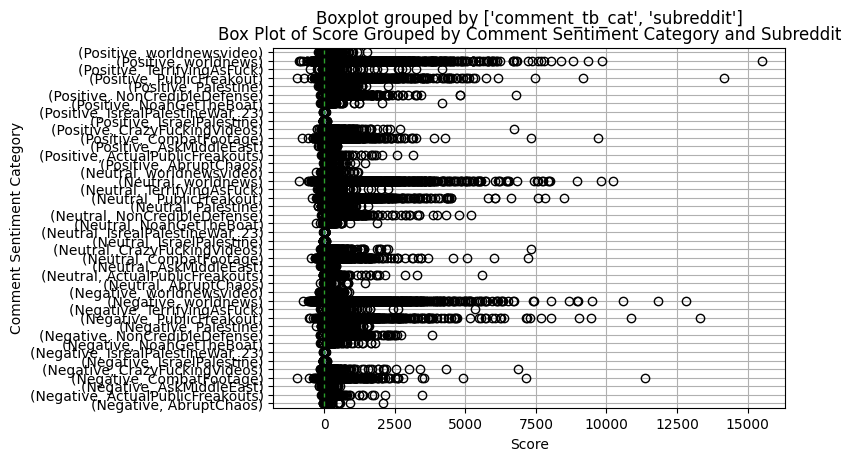

In [ ]:
# Plotting the sentiment distribution

plt.figure(figsize=(12, 8))
df_merged.boxplot(column='score', by=['comment_tb_cat', 'subreddit'], vert=False)
plt.xlabel('Score')
plt.ylabel('Comment Sentiment Category')
plt.title('Box Plot of Score Grouped by Comment Sentiment Category and Subreddit')
plt.show()

<Figure size 1200x600 with 0 Axes>

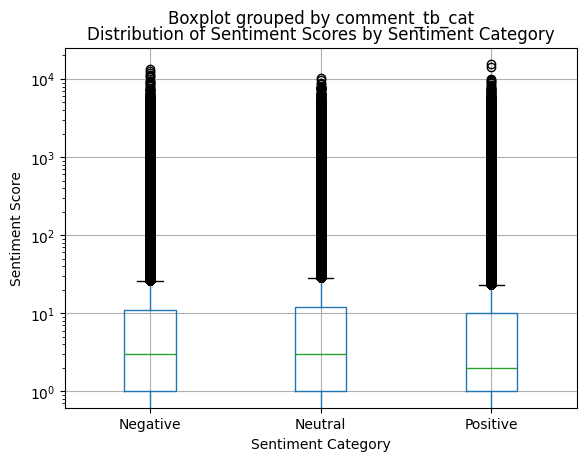

In [ ]:
# Plotting the sentiment distribution
plt.figure(figsize=(12, 6))
df_merged.boxplot(column='score', by='comment_tb_cat')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.yscale('log')
plt.title('Distribution of Sentiment Scores by Sentiment Category')
plt.show()

<Figure size 1000x600 with 0 Axes>

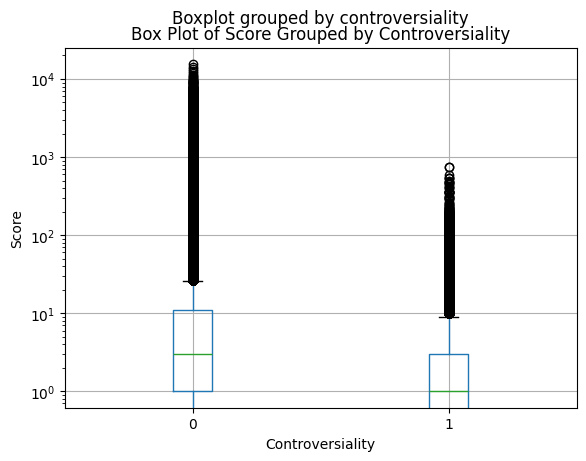

In [ ]:
# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
df_merged.boxplot(column='score', by='controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Score')
plt.yscale('log')
plt.title('Box Plot of Score Grouped by Controversiality')
plt.show()

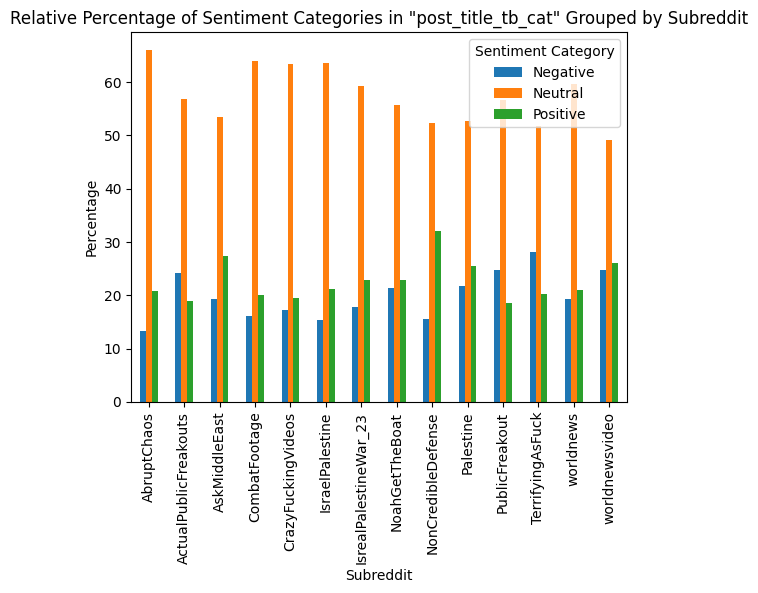

In [ ]:
# Plotting the sentiment distribution
# df_merged.groupby(['subreddit', 'post_title_tb_cat']).size().unstack().plot(kind='bar', stacked=False)
# Plotting the sentiment distribution
df_merged.groupby(['subreddit', 'post_title_tb_cat']).size().unstack().apply(lambda x: x*100/x.sum(), axis=1).plot(kind='bar', stacked=False)
plt.ylabel('Percentage')
plt.xlabel('Subreddit')
plt.title('Relative Percentage of Sentiment Categories in "post_title_tb_cat" Grouped by Subreddit')
plt.legend(title='Sentiment Category')
plt.show()

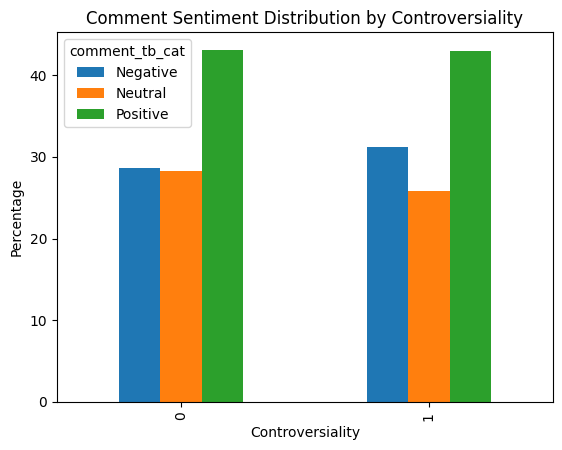

In [ ]:
# Plotting the sentiment distribution

df_grouped = df_merged.groupby(['controversiality', 'comment_tb_cat']).size().unstack()


df_grouped_percentage = df_grouped.apply(lambda x: x / x.sum() * 100, axis=1)
df_grouped_percentage.plot(kind='bar')

plt.xlabel('Controversiality')
plt.ylabel('Percentage')
plt.title('Comment Sentiment Distribution by Controversiality')

plt.show()
del df_grouped, df_grouped_percentage

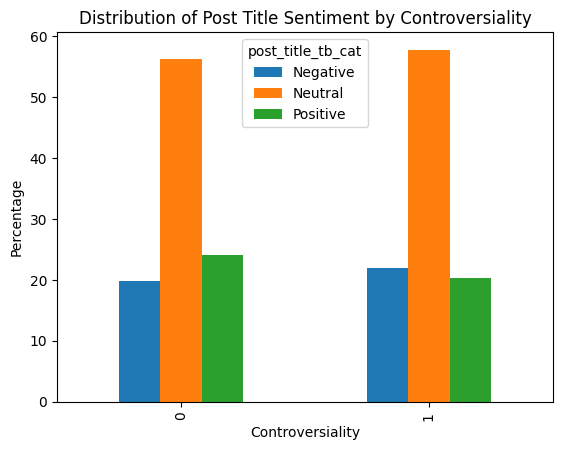

In [ ]:
# Plotting the sentiment distribution
df_grouped_percentage = df_grouped.apply(lambda x: x / x.sum() * 100, axis=1)
df_grouped_percentage.plot(kind='bar')

plt.xlabel('Controversiality')
plt.ylabel('Percentage')
plt.title('Distribution of Post Title Sentiment by Controversiality')

plt.show()


In [ ]:

# Count the occurrences of each sentiment category
sentiment_counts_df = pd.DataFrame(sentiment_filtered_df['comment_sentiment_category'].value_counts())
sentiment_counts_df.columns = ['Count']
sentiment_counts_df.index.name = 'comment_sentiment'
sentiment_counts_df.reset_index(inplace=True)
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')
# Count the occurrences of each sentiment category
sentiment_counts = post_sentiment_filtered_df['post_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Post_Sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

# Count the occurrences of each sentiment category
sentiment_counts = post_sentiment_filtered_df['post_sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Post_Sentiment', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

# Bypass

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =sentiment_counts_df.Post_Sentiment,
    values = sentiment_counts_df.Count,
    title = {"position": "top center"}
    ))
fig.update_layout(
    title="Funnel-Chart of Sentiment Distribution | Posts",
    title_x=0.5, width=500, height=400)
fig.show()


plt.figure(figsize=(5, 5))
ax = plt.pie(x =post_sentiment_filtered_df['post_sentiment_category'].value_counts() , labels=post_sentimenet_filtered_df['post_sentiment_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Posts')
plt.show()

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =sentiment_counts_df.Post_Sentiment,
    values = sentiment_counts_df.Count,
    title = {"position": "top center"}
    ))
fig.update_layout(
    title="Funnel-Chart of Sentiment Distribution | Posts",
    title_x=0.5, width=500, height=400)
fig.show()


plt.figure(figsize=(5, 5))
ax = plt.pie(x =post_self_text_filtered_df['post_sentiment_category'].value_counts() , labels=post_sentimenet_filtered_df['post_sentiment_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Posts')
plt.show()

### Examples of of TextBlob Positive, Negative, and Neutral posts

In [ ]:
# Neutral posts
post_self_text_filtered_df[
    (post_self_text_filtered_df['post_sentiment_category'] == 'Neutral') &  (post_self_text_filtered_df['post_self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

In [ ]:
# positive posts
post_self_text_filtered_df[
    (post_self_text_filtered_df['post_sentiment_category'] == 'Positive') &  (post_self_text_filtered_df['post_self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

In [ ]:
# Negative posts
post_self_text_filtered_df[
    (post_self_text_filtered_df['post_sentiment_category'] == 'Negative') &  (post_self_text_filtered_df['post_self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

#### **Analyzing Sentiment Trends Over Time**

In [ ]:
# Create legend patches
positive_patch = mpatches.Patch(color='green', label='Positive')
negative_patch = mpatches.Patch(color='red', label='Negative')
neutral_patch = mpatches.Patch(color='blue', label='Neutral')

# Group by 'created_time' and calculate the mean sentiment for each time period
sentiment_by_time = post_self_text_filtered_df.groupby(post_self_text_filtered_df['post_created_time'].dt.date)['post_sentiment'].mean()

# Replace 'sentiment_scores' with the actual variable or column containing sentiment scores
sentiment_scores = post_self_text_filtered_df['post_sentiment']

# Calculate dynamic thresholds based on percentiles
percentile_25 = np.percentile(sentiment_scores, 25)
percentile_75 = np.percentile(sentiment_scores, 75)

# Classify sentiments based on dynamic thresholds
post_self_text_filtered_df['post_sentiment_category'] = np.where(
    post_self_text_filtered_df['post_sentiment'] < percentile_25, 'Negative',
    np.where( post_self_text_filtered_df['post_sentiment'] > percentile_75, 'Positive','Neutral' ))

# Plot the sentiment over time with lines connecting points and different colors for each category
plt.figure(figsize=(15, 6))

for idx, row in sentiment_by_time.reset_index().iterrows():
    date = row['post_created_time']
    sentiment = post_self_text_filtered_df.loc[post_self_text_filtered_df['post_created_time'].dt.date == date, 'post_sentiment_category'].iloc[0]

    # Assign colors based on sentiment category
    color = 'green' if sentiment == 'Positive' else ('red' if sentiment == 'Negative' else 'blue')

    # Plot the point
    plt.plot(date, row['post_sentiment'], marker='o', color=color)

    # Connect with lines to the previous point
    if idx > 0:
        plt.plot([previous_date, date], [previous_sentiment, row['post_sentiment']], color=color)

    previous_date = date
    previous_sentiment = row['post_sentiment']

# Add legend with colored boxes
plt.legend(handles=[positive_patch, negative_patch, neutral_patch], title='Sentiment Category')
plt.title('Sentiment Over Time | Posts')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')

# Display every other date on x-axis
plt.xticks(sentiment_by_time.index[::2], rotation=45, ha='right')

plt.show()

In [ ]:
# Filter posts by sentiment category
positive_posts = post_self_text_filtered_df[post_self_text_filtered_df['post_sentiment_category'] == 'Positive']
negative_posts = post_self_text_filtered_df[post_self_text_filtered_df['post_sentiment_category'] == 'Negative']
neutral_posts = post_self_text_filtered_df[post_self_text_filtered_df['post_sentiment_category'] == 'Neutral']

# Group by 'post_created_time' and calculate counts
positive_counts_per_day = positive_posts.groupby(positive_posts['post_created_time'].dt.date).size()
negative_counts_per_day = negative_posts.groupby(negative_posts['post_created_time'].dt.date).size()
neutral_counts_per_day = neutral_posts.groupby(neutral_posts['post_created_time'].dt.date).size()

# Plotting using Seaborn
plt.figure(figsize=(15, 6))

# Plot lines for each sentiment category
sns.lineplot(x=positive_counts_per_day.index, y=positive_counts_per_day.values, label='Positive',  color='green')
sns.lineplot(x=negative_counts_per_day.index, y=negative_counts_per_day.values, label='Negative',  color='red')
sns.lineplot(x=neutral_counts_per_day.index, y=neutral_counts_per_day.values, label='Neutral' , color='blue')

plt.title('Sentiment Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.xticks(positive_counts_per_day.index[::2], rotation=45, ha='right')  # Display every second date for better visibility
plt.show()

### **Examples of Positive, Negative, and Neutral comments individually**

In [ ]:
# Neutral comments
sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Neutral'].sample(n=5, random_state=random.seed())[['self_text', 'comment_sentiment', 'comment_sentiment_category']]

In [ ]:
# Positive comments
sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Positive'].sample(n=5, random_state=random.seed())[['self_text', 'comment_sentiment', 'comment_sentiment_category']]

In [ ]:
# Negative comments
sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Negative'].sample(n=5, random_state=random.seed())[['self_text', 'comment_sentiment', 'comment_sentiment_category']]

**Analyzing comments Trends Over Time**

In [ ]:
plt.figure(figsize=(5, 5))
ax = plt.pie(x =sentiment_filtered_df['comment_sentiment_category'].value_counts() , labels=sentiment_filtered_df['comment_sentiment_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Comments')
plt.show()

In [ ]:
# Group by 'created_time' and calculate the mean sentiment for each time period
sentiment_by_time = sentiment_filtered_df.groupby(sentiment_filtered_df['created_time'].dt.date)['comment_sentiment'].mean()

# Replace 'sentiment_scores' with the actual variable or column containing sentiment scores
sentiment_scores = sentiment_filtered_df['comment_sentiment']

# Calculate dynamic thresholds based on percentiles
percentile_25 = np.percentile(sentiment_scores, 25)
percentile_75 = np.percentile(sentiment_scores, 75)

# Classify sentiments based on dynamic thresholds
sentiment_filtered_df['comment_sentiment_category'] = np.where(
    sentiment_filtered_df['comment_sentiment'] < percentile_25, 'Negative',
    np.where(
        sentiment_filtered_df['comment_sentiment'] > percentile_75, 'Positive',
        'Neutral'
    )
)

# Plot the sentiment over time with lines connecting points and different colors for each category
plt.figure(figsize=(12, 6))

for idx, row in sentiment_by_time.reset_index().iterrows():
    date = row['created_time']
    sentiment = sentiment_filtered_df.loc[sentiment_filtered_df['created_time'].dt.date == date, 'comment_sentiment_category'].iloc[0]

    # Assign colors based on sentiment category
    color = 'green' if sentiment == 'Positive' else ('red' if sentiment == 'Negative' else 'blue')

    # Plot the point
    plt.plot(date, row['comment_sentiment'], marker='o', color=color)

    # Connect with lines to the previous point
    if idx > 0:
        plt.plot([previous_date, date], [previous_sentiment, row['comment_sentiment']], color=color)

    previous_date = date
    previous_sentiment = row['comment_sentiment']

# Add legend with colored boxes
plt.legend(handles=[positive_patch, negative_patch, neutral_patch], title='Sentiment Category')
plt.title('Sentiment Over Time | Comments')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')

# Display every other date on x-axis
plt.xticks(sentiment_by_time.index[::2], rotation=45, ha='right')

plt.show()

In [ ]:
# Filter comments by sentiment category
positive_comment = sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Positive']
negative_comment = sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Negative']
neutral_comment = sentiment_filtered_df[sentiment_filtered_df['comment_sentiment_category'] == 'Neutral']

# Group by 'post_created_time' and calculate counts
positive_counts_per_day = positive_comment.groupby(positive_comment['created_time'].dt.date).size()
negative_counts_per_day = negative_comment.groupby(negative_comment['created_time'].dt.date).size()
neutral_counts_per_day = neutral_comment.groupby(neutral_comment['created_time'].dt.date).size()

plt.figure(figsize=(15, 6))

# Plot lines for each sentiment category
sns.lineplot(x=positive_counts_per_day.index, y=positive_counts_per_day.values, label='Positive',  color='green')
sns.lineplot(x=negative_counts_per_day.index, y=negative_counts_per_day.values, label='Negative',  color='red')
sns.lineplot(x=neutral_counts_per_day.index, y=neutral_counts_per_day.values, label='Neutral' , color='blue')

plt.title('Sentiment Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()
plt.xticks(positive_counts_per_day.index[::2], rotation=45, ha='right')  # Display every second date for better visibility
plt.show()

# EDA for the Dataset

In [ ]:
filtered_df['post_created_time'] = pd.to_datetime(filtered_df['post_created_time'])

# Calculate date difference
date_difference = filtered_df['post_created_time'].max() - filtered_df['post_created_time'].min()

# Calculate years, months, and days
years = date_difference.days // 365
months = (date_difference.days % 365) // 30
days = (date_difference.days % 365) % 30

result = f"Data covers a period of {years} years, {months} months, {days} days, \nfrom {filtered_df['post_created_time'].min().date()} till {filtered_df['post_created_time'].max().date()}"
print(result)
print(filtered_df.shape)

Data covers a period of 0 years, 8 months, 15 days, 
from 2023-10-07 till 2024-06-18
(1544785, 27)


In [ ]:
# filtered_df.groupby(pd.Grouper(key='created_time', freq='1W'))
filtered_df['created_time'].dt.to_period('W').dt.to_timestamp()


0         2024-06-17
1         2024-06-17
             ...    
1544822   2023-10-02
1544826   2023-10-02
Name: created_time, Length: 1544785, dtype: datetime64[ns]

## Highest post score & comment

In [ ]:
pd.DataFrame(filtered_df.loc[filtered_df['post_score'].idxmax()][[ 'post_title', 'post_score', 'subreddit', 'post_created_time']]).T

In [ ]:
pd.DataFrame(filtered_df.loc[filtered_df['score'].idxmax()][['self_text', 'post_title', 'score', 'subreddit', 'created_time']]).T

NameError: name 'pd' is not defined

## Total Authors

In [ ]:
print("Number of unique authors:",  filtered_df['author_name'].nunique())

### Correlation Analysis between scores, karma, upvotes/downvotes, and user_total_karma to identify patterns.

In [ ]:
# Select numerical features for correlation analysis
numerical_columns = filtered_df.select_dtypes(include='number').columns

# Create a subset DataFrame with selected features
correlation_df = filtered_df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Correlation Matrix 12-1-2024')
plt.show()

🍉 Insights 🍉

From the provided correlation matrix, we can see that:

1. High Correlation (0.75)to(1.0):

* the columns "post_thumbs_ups" and "post_score" also have a perfect positive correlation (1.0), suggesting redundancy. We may choose to keep "post_score".
* Similarly but with a lower score, the columns "user_total_karma" and "user_comment_karma" also have a high positive correlation (0.82), suggesting redundancy. We choose to drop "user_comment_karma".
* In addition to another high positive correlation (0.75). we choose to drop "user_link_karma", and keep"user_total_karma".

2. medium Correlations:

* User_awardee_karma, user_total_karma have a moderate positive correlation, suggesting that users who write comments are also likely to takes awards.
3. Columns with lowest Correlation:

* The column "downs"has lowest correlation with other features, indicating no linear relationship. We consider dropping "downs" as it does not contribute meaningfully to our analysis

In [ ]:
filtered_df[['post_thumbs_ups','post_score','user_total_karma','user_comment_karma','user_link_karma','downs']]

### droping the unmeaningful features from the correlation analysis

In [ ]:
filtered_df= filtered_df.drop(columns=['downs','post_thumbs_ups','user_comment_karma','user_link_karma'])
filtered_df.columns

In [ ]:
filtered_df.dtypes

# Descriptive Statisics

In [ ]:
# Descriptive statistics for numerical features
filtered_df.describe().T

In [ ]:
# Descriptive statistics for categorical features
filtered_df.describe(include='object').T

### exploring isrealpalestine Subreddit comments overtime

In [ ]:
popular_subreddits = filtered_df['subreddit'].value_counts()
popular_subreddits.columns=['subreddit', 'count']
popular_subreddits

subreddit
IsraelPalestine          516565
worldnews                358944
Palestine                178872
AskMiddleEast            135893
PublicFreakout           100916
CombatFootage             87369
worldnewsvideo            56416
NonCredibleDefense        51496
IsrealPalestineWar_23     21297
CrazyFuckingVideos        16469
TerrifyingAsFuck           7724
ActualPublicFreakouts      6971
NoahGetTheBoat             3079
AbruptChaos                2774
Name: count, dtype: int64

In [ ]:
# Filter DataFrame for 'IsraelPalestine' subreddit
filtered_df_israel_palestine = filtered_df[filtered_df['subreddit'] == 'IsraelPalestine']

# Drop duplicates based on 'author_name' and 'user_account_created_time'
filtered_df_unique = filtered_df_israel_palestine.drop_duplicates(subset=['author_name', 'self_text'], keep='first')

filtered_df_unique['created_time'] = pd.to_datetime(filtered_df_unique['created_time']).dt.date

# Get the dates with the most account creations
top_dates = filtered_df_unique['created_time'].value_counts()

# Create a DataFrame from the top dates
top_dates_df = pd.DataFrame({'Date': top_dates.index, 'Account_Creations': top_dates.values})

# Sort the DataFrame by date
top_dates_df = top_dates_df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x='Date', y='Account_Creations', data=top_dates_df, palette='viridis')

# Add labels to the data points
for x, y in zip(top_dates_df['Date'], top_dates_df['Account_Creations']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, rotation=45)

# Set the x-axis tick labels
date_ticks = top_dates_df['Date'][::2]  # Display every second date
plt.xticks(date_ticks, rotation=45, ha='right')

plt.title('Daily Commenting Activity | "IsraelPalestine" Subreddit ')
plt.xlabel('Date')
plt.ylabel('Account Creations')
plt.tight_layout()
plt.show()

## 🍉 Insights 🍉

The Earliest Comment Activity:
* Notably, "IsraelPalestine"  started in early November.

Top Day of highest comment rate:

* It's intriguing to observe that "Israelpalestine" subreddit experienced peaks in commenting around mid-November.
* "IsraelPalestine" stands out as having the highest total number of comments on its top day, reaching approximately +6359 comments on November 19, 2023.

Day with the Lowest Comment Rate:

* On November 6, 2023, the 'IsraelPalestine' subreddit experienced the lowest commenting rate, which is the first day for this Subreddit commuiny, with around 1063 comments.

Consistency and Variability:

* The data shows varying levels of commenting activity throughout the period, with fluctuations in comments creations. Yet a notable consistency is observed during mid-November, where the subreddit maintained a relatively high level of commenting activity over several consecutive days.

Decrease in Engagement:

* The gradual decline in comments towards the end of the dataset, especially from lately December, indicates a decrease in engagement.

### Exploring the Most Engaging Subreddit | IsraelPalestine

In [ ]:
# Count unique active users in the 'IsraelPalestine' subreddit
unique_users_count = filtered_df[filtered_df['subreddit'] == 'IsraelPalestine']['author_name'].nunique()
display(HTML(f"<h3>Number of unique users in IsraelPalestine subreddit: <b style='color:red'>{unique_users_count}</b></h3>"))

In [ ]:
# Filter posts related to 'IsraelPalestine' subreddit
posts_israel_palestine = filtered_df[(filtered_df['subreddit'] == 'IsraelPalestine') & (filtered_df['post_self_text'].notnull())]
# Drop duplicate posts
unique_posts = posts_israel_palestine.drop_duplicates(subset='post_self_text')
posts_count = len(unique_posts)
display(HTML(f"<h3>Number of unique posts in IsraelPalestine subreddit : <b style='color:red'>{posts_count}</b></h3>"))

In [ ]:
# Filter comments related to 'IsraelPalestine' subreddit
comments_israel_palestine = filtered_df[(filtered_df['subreddit'] == 'IsraelPalestine') & (filtered_df['self_text'].notnull())]
# Drop duplicate comments
unique_comments = comments_israel_palestine.drop_duplicates(subset='self_text')
# Get the counts
comments_count = len(unique_comments)
display(HTML(f"<h3>Number of unique comments in IsraelPalestine subreddit : <b style='color:red'>{comments_count}</b></h3>"))

In [ ]:
# Find the earliest post_created_time and corresponding post_self_text
earliest_post = posts_israel_palestine.loc[posts_israel_palestine['post_created_time'].idxmin()]
earliest_post_time = earliest_post['post_created_time']
earliest_post_text = earliest_post['post_self_text']
display(HTML(f"<h4>Earliest post created time : <b style='color:red'>{earliest_post_time}</b></h4>"))
display(HTML(f"<h4>Earliest post : <b style='color:red'>{earliest_post_text}</b></h4>"))
horizontal_line= '<hr style="border: none; background-color: #000000; height: 1px; margin: 5px 0;">'

display(HTML(horizontal_line))

last_post = posts_israel_palestine.loc[posts_israel_palestine['post_created_time'].idxmax()]
last_post_time = last_post['post_created_time']
last_post_text = last_post['post_self_text']
display(HTML(f"<h4>Last post created time : <b style='color:red'>{last_post_time}</b></h4>"))
display(HTML(f"<h4>Last post : <b style='color:red'>{last_post_text}</b></h4>"))

### WORDCLOUD OF COMMENTS

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'post_created_time' and 'post_self_text' are columns in israel_palestine_df
comment_words = ''
stopwords = set(STOPWORDS)

# Iterate through the DataFrame rows
for index, row in sentiment_filtered_df.iterrows():
    # Concatenate 'post_self_text' values
    val = str(row['self_text'])

    # Split the value into tokens
    tokens = val.split()

    # Convert each token to lowercase
    tokens = [token.lower() for token in tokens]

    # Join the lowercase tokens
    comment_words += " ".join(tokens) + " "

# Generate WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("comments on 12-1-2024")
plt.show()

### Trends Period

In [ ]:
filtered_df_unique = filtered_df.copy()

filtered_df_unique['created_time'] = pd.to_datetime(filtered_df_unique['created_time']).dt.date

# Get the dates with the most account creations
top_dates = filtered_df_unique['created_time'].value_counts()

# Create a DataFrame from the top dates
top_dates_df = pd.DataFrame({'Date': top_dates.index, 'Comment_Creations': top_dates.values})

# Sort the DataFrame by date
top_dates_df = top_dates_df.sort_values(by='Date')

# Plotting using Seaborn
plt.figure(figsize=(20,6))
lineplot = sns.lineplot(x='Date', y='Comment_Creations', data=top_dates_df, palette='viridis')

# Add labels to the data points
for x, y in zip(top_dates_df['Date'], top_dates_df['Comment_Creations']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10, rotation=45)

# Set the x-axis tick labels
date_ticks = top_dates_df['Date'][::2]  # Display every second date
plt.xticks(date_ticks, rotation=45, ha='right')

# Highlight the time period from 24 November 2023 to 30 November 2023 in a different color
highlight_start_date = pd.Timestamp('2023-11-24')
highlight_end_date = pd.Timestamp('2023-11-30')

lineplot.axvspan(highlight_start_date, highlight_end_date, color='lightcoral', alpha=0.3, label='Temporary Ceasefire Period')


plt.title('Temporal Trends - Comments per Day | All Subreddits')
plt.xlabel('Date')
plt.ylabel('Total Number of Comments')
plt.legend( title_fontsize='12', loc='upper left')
plt.tight_layout()
plt.show()

### Ceasefire Impact:

* There is a noticeable decline in the number of comments from November 24th to November 30th, possibly due to the announced ceasefire during that period. This decline aligns with a decrease in commenting activity.

In [ ]:
# Assuming 'post_created_time' is a datetime column in israel_palestine_df
filtered_df['post_created_time'] = pd.to_datetime(filtered_df['post_created_time'])

# Group by date and count the number of posts for each day
filtered_df.groupby(filtered_df['post_created_time'].dt.date)['post_self_text'].count()

# 🍉 Analysis

In [ ]:
# Assuming 'self_text' is the column containing posts/comments in your DataFrame
emoji = '🍉'
emoji_counts = filtered_df['self_text'].str.count(emoji)

# Create a new column in the DataFrame with the counts
filtered_df['emoji_counts'] = emoji_counts

# Sum the counts to get the total occurrences
total_occurrences = emoji_counts.sum()

# Print the total occurrences
print(f'Total occurrences of 🍉 emoji: {total_occurrences}')

# Plot a bar chart with color gradient to visualize the occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df.index, y=filtered_df['emoji_counts'], color='red')
plt.xlabel('Index')
plt.ylabel('Emoji Counts')
plt.title('Scatter Plot of 🍉 Emoji Counts in Posts/Comments')
plt.show()

In [ ]:
# Assuming 'self_text' is the column containing posts/comments in your DataFrame
emoji = '🍉'
emoji_counts = filtered_df['self_text'].str.count(emoji)

# Create a new column in the DataFrame with the counts
filtered_df['emoji_counts'] = emoji_counts

# Sum the counts to get the total occurrences
total_occurrences = emoji_counts.sum()

# Print the total occurrences
print(f'Total occurrences of 🍉 emoji: {total_occurrences}')

# Filter rows where the emoji count is greater than 0
comments_with_emoji = filtered_df[emoji_counts > 0]

# Iterate over the DataFrame and print occurrences
for index, row in comments_with_emoji.iterrows():
    print(f'Index {index}: {row["self_text"]}')

# Plot a bar chart to visualize the occurrences
# Your plotting code goes here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'self_text' is the column containing posts/comments in your DataFrame
emojis_to_count = ['🍉', '🇵🇸']  # 🇵🇸 represents the Palestinian flag emoji

# Create a new column in the DataFrame for each emoji count
for emoji in emojis_to_count:
    emoji_counts = filtered_df['self_text'].str.count(emoji)
    filtered_df[f'{emoji}_counts'] = emoji_counts

# Sum the counts for each emoji to get the total occurrences
total_occurrences = filtered_df[[f'{emoji}_counts' for emoji in emojis_to_count]].sum()

# Display the total occurrences of each emoji
print(f'Total occurrences of each emoji: {total_occurrences}')

# Plot a bar chart to visualize the occurrences
plt.figure(figsize=(10, 6))
sns.barplot(x=emojis_to_count, y=total_occurrences.values, palette='viridis')
plt.xlabel('Emoji')
plt.ylabel('Total Occurrences')
plt.title('Total Occurrences of Emojis in Posts/Comments')
plt.show()
for emoji in emojis_to_count:
    emoji_counts = filtered_df['self_text'].str.count(emoji)
    filtered_df[f'{emoji}_counts'] = emoji_counts

# Sum the counts for each emoji to get the total occurrences
total_occurrences = filtered_df[[f'{emoji}_counts' for emoji in emojis_to_count]].sum()


# Plot a pie chart to visualize the occurrences
plt.figure(figsize=(8, 8))
plt.pie(total_occurrences, labels=emojis_to_count, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Occurrences of Emojis in Posts/Comments')
plt.show()

# Geopolitical Determination

Identify Author Locations
Reddit, a predominantly anonymous community, faces challenges in discerning the geographical locations of its users. While Reddit has access to users' IP addresses, this information remains undisclosed to the public.

An effective strategy involves recognizing that user activity, particularly engagement through comments, tends to peak from 12:00 to 21:00 UTC. By leveraging this temporal pattern, we can make a tentative inference about a user's likely country or region based on their prevalent posting times.

To achieve this, we will follow these steps:

1. Extract the hour component from the `created_time` column.
2. Aggregate the data by `author_name` and compute the mean hour for each user.
3. Utilize the mean hour to estimate the probable time zone associated with each user.
4. Summarize the count of users within each estimated time zone.

In [ ]:
# Extract hour from 'created_time'
filtered_df['hour'] = filtered_df['created_time'].dt.hour

# Group by 'author_name' and calculate the mean hour
df_users = filtered_df.groupby('author_name')['hour'].mean().reset_index()

# Function to estimate timezone from mean hour
def estimate_timezone(hour):
    '''
    estimate_timezone function takes the mean hour as input and estimates the timezone based on the assumption that the most active time
    is between 12:00 - 21:00 local time. The function then calculates the difference (local_hour) between the mean hour and 12,and constructs
    a string in the format "UTC{local_hour:+03d}:00". This string represents the estimated timezone with a UTC offset.

    For example:
    If the mean hour is 15, then local_hour would be 3, and the returned timezone would be "UTC+03:00".
    If the mean hour is 9, then local_hour would be -3, and the returned timezone would be "UTC-03:00".
    This way, you're expressing the timezone as a UTC offset relative to UTC time.
    '''
    # Assuming most active time is between 12:00 - 21:00 local time
    local_hour = int (hour - 12)
    return f"UTC{local_hour:+03d}:00"

# Apply the timezone estimation function
df_users['estimated_timezone'] = df_users['hour'].apply(estimate_timezone)

# Count the number of users in each estimated timezone
timezone_distribution = df_users['estimated_timezone'].value_counts()
timezone_distribution

In [ ]:
#Aggregate the data by author_name and compute the mean hour for each user.
filtered_df.groupby('author_name')['hour'].mean().reset_index()

In [ ]:
# Get a list of time zones
time_zones = pytz.all_timezones

# Create a mapping of UTC offsets to countries
utc_region_mapping = defaultdict(list)

for time_zone in time_zones:
    tz = pytz.timezone(time_zone)
    now = tz.localize(datetime.datetime.now())
    offset = now.utcoffset()
    utc_offset = offset.total_seconds() // 3600
    utc_region_mapping[f'{utc_offset:+03.0f}:00'].append(time_zone)

# Convert defaultdict to a regular dictionary
utc_region_mapping = dict(utc_region_mapping)

# Function to estimate region from UTC offset
def estimate_region(estimated_timezone):
    # Extract UTC offset from the 'estimated_timezone' column
    utc_offset = estimated_timezone[-6:]

    # Map UTC offset to region using the provided utc_region_mapping
    return utc_region_mapping.get(utc_offset, 'Unknown')

# Apply the region estimation function
df_users['region'] = df_users['estimated_timezone'].apply(estimate_region)

df_users.head()

# Controversiality Analysis

In [ ]:
filtered_df['controversiality'] = df_original['controversiality']
# Create comment_df with non-NaN values in both self_text and post_self_text
comment_df = filtered_df.dropna(subset=['self_text','post_self_text'])
# drop duplicate comments (like comments by Reddit Commuinty)
comment_df = comment_df.drop_duplicates(subset=['self_text'])
controversiality_counts = comment_df['controversiality'].value_counts()
controversiality_counts

controversiality
0    639607
1     32825
Name: count, dtype: int64

In [ ]:
# Calculate controversiality percentages for each subreddit
controversiality_percentages = comment_df.groupby('subreddit')['controversiality'].mean().sort_values(ascending=False)

# Sort subreddits based on the highest comment_id
subreddit_sorted = comment_df.groupby('subreddit')['comment_id'].count().sort_values(ascending=False).index

# Set up subplots
num_subplots = min(12, len(controversiality_percentages))  # Display only 12 charts
num_cols = 6  # Display 6 charts per line
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot pie charts for each subreddit
for i, subreddit in enumerate(subreddit_sorted[:num_subplots]):
    # Filter data for the current subreddit
    subreddit_data = comment_df[comment_df['subreddit'] == subreddit]
    # Calculate controversiality distribution
    controversiality_counts = subreddit_data['controversiality'].value_counts()
    # Plot the pie chart for the current subreddit
    axes[i].pie(controversiality_counts, labels=controversiality_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    axes[i].set_title(f'{subreddit}')

plt.tight_layout()
plt.show()

In [ ]:
comment_df[comment_df['controversiality'] == 1].sort_values(by=['score','user_total_karma'], ascending=False).head()[['self_text', 'score', 'user_total_karma', 'controversiality']]

In [ ]:
comment_df[comment_df['controversiality'] == 0].sort_values(by=['score','user_total_karma'], ascending=False).head()[['self_text', 'score', 'user_total_karma', 'controversiality']]

# Topic modeling

## K Means Code

In [ ]:
from scipy.sparse import issparse
from scipy.sparse import lil_matrix, csr_matrix

def dot_product(a, b):
    """
    Returns the dot product between two vector arrays
    """
    # d_sum = 0.0
    # for ((idx,), val) in np.ndenumerate(a):
    #     d_sum += float(val) * float(b[idx])
    # return d_sum
    if not isinstance(a, scipy.sparse.spmatrix) or not isinstance(b, scipy.sparse.spmatrix):
        raise TypeError("a and b must be scipy.sparse matrices")
    return a.dot(b.T).toarray()[0][0]

def l2_norm(a):
    return math.sqrt(dot_product(a, a))


def O_cosine_similarity0(a, b):
    """
        Returns the cosine similarity between two vector arrays
    """
    numerator =  dot_product(a, b)
    denominator = (l2_norm(a) * l2_norm(b))
    return np.nan_to_num(np.divide(numerator, denominator))
def cosine_similarity(a, b):
    """
        Returns the cosine similarity between two vector arrays
    """
    dot =  dot_product(a, b)
    return 2*(1-dot)
def get_cosine_distance(a, b, trace=False):
    if trace == True:
        ipdb.set_trace()
    # print('Generating cosine distance matrix')
    dot_prod = a.dot(b.T)
    ones_matrix = lil_matrix(dot_prod.shape)
    ones_matrix[:] = 1
    ones_matrix = ones_matrix.tocsr()
    subtracted_matrix = ones_matrix - dot_prod
    dmat = 2 * subtracted_matrix
    # print('Cosine distance matrix generated')
    return dmat
def _get_cosine_distance(a, b):
    return 1 - cosine_similarity(a, b)

def check_matrixtype(data):
    if not issparse(data):
        raise TypeError("Data must be a scipy.sparse matrix")

class KMeans:
    def __init__(self, k=3, tolerance=0.0001, max_iterations=500, verbose=False):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.centroids = {}
        self.classes = {}
        self.verobse = verbose

    def vprint(self, text, verbose=None):
        if verbose is None and self.verbose:
            print(text)
        elif verbose:
            print(text)
        else:
            pass

    def fit(self, data):
        # initialize the centroids, a random sample 'k' elements in the dataset will be our initial centroids
        # data_sample = random.sample(list(data), self.k)
        self.centroids = {}
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        # print('Random Indices Generated')
        self.centroid_matrix = data[random_indices]
        for i, index in tqdm(enumerate(random_indices, disable=True)):
            self.centroids[i] = data[index]
        print("Initialize fitting with " + str(self.k) + " centroids")

        # begin iterations
        for i in tqdm(range(self.max_iterations)):
            print("Beginning iteration " + str(i) + " of the K-Means algorithm...")
            self.classes = {}
            # ipdb.set_trace()
            # distance_matrix = get_cosine_distance(data, self.centroid_matrix)
            # k_means_class = np.argmin(distance_matrix, axis=1)
            k_means_class = self.pred(data)
            previous = dict(self.centroids)
            for class_value in tqdm(range(self.k), disable=True):
                # print(f'Class Value: {class_value}')
                indices = np.where(k_means_class == class_value)[0]
                class_matrix = data[indices]
                try:
                    class_matrix_avg = class_matrix.mean(axis=0)
                    self.classes[class_value] = class_matrix_avg
                    self.centroids[class_value] = csr_matrix(class_matrix_avg)
                    self.centroid_matrix = scipy.sparse.vstack(list(self.centroids.values()))
                    # print('Centroid Matrix Updated')
                except:
                    print('Error in updating centroid matrix, Last centroid matrix used')
                    continue
            # average the cluster data points to re-calculate the centroids
            is_optimal = True

            for centroid in tqdm(self.centroids, disable=True):
                # print(f'At iteration {i}, centroid: {centroid}')
                original_centroid = previous[centroid]
                # if issparse(original_centroid):
                #     original_centroid = original_centroid.toarray()[0]

                curr = self.centroids[centroid]
                distance_matrix = get_cosine_distance(curr, original_centroid, trace=False)
                distance_value = distance_matrix[0][0]
                if distance_value > self.tolerance:
                    is_optimal = False

            # If the results change their positions less than our tolerance value, break out of the loop
            if is_optimal:
                print("Optimal centroids have been found after " + str(i) + " iterations, stopping...")
                break
            else:
                print (f'Current distance value is {distance_value}')

    def fit0(self, data):
        # initialize the centroids, a random sample 'k' elements in the dataset will be our initial centroids

        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = {}
        for i, index in enumerate(random_indices):
            self.centroids[i] = data[index]

        print("Initialize fitting with " + str(self.k) + " centroids")

        # begin iterations
        for i in range(self.max_iterations):
            print("Beginning iteration " + str(i) + " of the K-Means algorithm...")
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            # find the cosine distance between the point and each centroid and pick the closest one
            for features in data:
                classification = self.pred(features)
                self.classes[classification].append(features)

            previous = dict(self.centroids)
            # print('Line 61')
            # average the cluster data points to re-calculate the centroids
            for classification in self.classes:
                # ipdb.set_trace()
                self.centroids[classification] = np.vstack(self.classes[classification]).mean(axis=0)
                # np.average(self.classes[classification], axis=0)

            is_optimal = True

            for centroid in tqdm(self.centroids):

                original_centroid = previous[centroid]
                if issparse(original_centroid):
                    original_centroid = original_centroid.toarray()[0]

                curr = self.centroids[centroid]
                if not isinstance(curr, np.ndarray):
                    raise TypeError("Centroids must be numpy arrays")

                if np.sum((curr - original_centroid) / original_centroid * 100.0) > self.tolerance:
                    is_optimal = False

            # If the results change their positions less than our tolerance value, break out of the loop
            if is_optimal:
                print("Optimal centroids have been found after " + str(i) + " iterations, stopping...")
                break

    def _pred0(self, data):
        """Predicts the assigned cluster for the given data point"""
        distances = [get_cosine_distance(data, self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    def pred(self, data):
        distance_matrix = get_cosine_distance(data, self.centroid_matrix)
        k_means_class = np.argmin(distance_matrix, axis=1)
        return k_means_class
    def get_clusters(self, vector_dict):
        """
        Given a dictionary with the IDs of the vectors, returns the IDs classified in the clusters.
        Used to generate the results report, given that it requires writing the user story Id instead
        of the features vector.
        """
        clusters = {}
        for i in range(self.k):
            clusters[i] = []
            # Add the vectors from self.classes to clusters, with the help of vector_dict
            for vector in self.classes[i]:
                vector_id = vector_dict[tuple(vector)]
                clusters[i].append(vector_id)
        return clusters

    def get_sse_score(self):
        """
        Returns the Sum of Squared Error (SSE) of the clusters.
        """
        sse_score = 0
        # Iterate through each cluster
        for i in range(self.k):
            # Inside each cluster, get the distance of each vector with the centroid
            for vector in self.classes[i]:
                # Calculate distance here
                distance = get_cosine_distance(vector, self.centroids[i])
                pow_distance = distance**2
                sse_score += pow_distance
        return sse_score

    def get_msc_avg(self):
        """
        Returns the Mean Silhouette Coefficient (MSC) of the clusters.
        """
        coefficients = []
        # Iterate through each cluster
        for i in range(self.k):
            # Inside each cluster, get the distance of each vector with the centroid
            for vector in self.classes[i]:
                a_values = []
                # Iterate through the points inside the current cluster
                for point in self.classes[i]:
                    distance = get_cosine_distance(vector, point)
                    a_values.append(distance)
                avg_a = mean(a_values)

                # Iterate through the points in the other clusters
                remaining_clusters = [key for key, value in self.classes.items() if key != i]
                avg_b_list = []
                for key in remaining_clusters:
                    b_values = []
                    for point in self.classes[key]:
                        distance = get_cosine_distance(vector, point)
                        b_values.append(distance)
                    avg_b = mean(b_values)
                    avg_b_list.append(avg_b)
                min_b = min(avg_b_list)

                # Calculate the silhouette coefficient for that point
                s_point = (min_b - avg_a) / float(max(avg_a, min_b))
                coefficients.append(s_point)

        # Get the average of all the coefficients
        msc_score_avg = mean(coefficients)
        return msc_score_avg

## K-Means Application

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df['clean_post_self_text'].fillna("", inplace=True)

# x = df['clean_post_self_text']
# x = df['self_text'].values.reshape(-1, 1)
text_col_name = 'clean_post_self_text'
non_empty_indices = df[df[text_col_name] != ''].index
none_indices = df[df[text_col_name] == None].index
empty_indices = df[df[text_col_name] == ''].index
print(f'Number of empty posts: {len(empty_indices)}')
print(f'Number of non-empty posts: {len(non_empty_indices)}')

# x = df.loc[non_empty_indices, 'self_text'].values#.reshape(-1, 1)
# y = df.loc[non_empty_indices, 'controversiality'].values
x0 = df[text_col_name].values.reshape(-1,1)
y = df['controversiality'].values

rus = RandomUnderSampler(random_state=42)
comment_text, y = rus.fit_resample(x0, y)
x = comment_text.reshape(-1)

# lda_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Assuming 10 topics
# lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

tfidf_matrix = vectorizer.fit_transform(x)


Number of empty posts: 870348
Number of non-empty posts: 677138


In [ ]:
comment_tfidf = vectorizer.transform(x0.reshape(-1))


In [ ]:
km = KMeans(k = 10, max_iterations=50)
km.fit(comment_tfidf)

TypeError: 'disable' is an invalid keyword argument for enumerate()

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10, random_state=42, n_jobs=-1)  # Assuming 10 topics
lda_topic_matrix = lda_model.fit_transform(comment_tfidf)

ValueError: could not convert string to float: ''

In [ ]:
x0

array([[''],
       [''],
       [''],
       ...,
       ['history almost repeated massacre munich entire israeli team killed haim gozali politician general yet almost murdered expedition people hate israel hope see understand along jewish student targeted student jewish people beaten sometimes death pro palestinian protest lynch attempt russian air port many many example people fault nothing jew targeted since war began israel first established allow jew place safe world day becoming apparent id like mention criticism israel anti semetic truly believe one criticizes israel israeli rhetoric becoming jew control everything hitler right thats cross certain line many jew dont feel safe diaspora especially time become clear dont else go feel morally superior lecture someone evil never experienced fear war understand going receptive telling doesnt moral right live want actually discussion someone come understanding place land war nine month probably isnt interested hearing screeching telli

In [ ]:
comment_tfidf_matrix = vectorizer.transform(x0.reshape(-1))
k_means_class = get_cosine_distance(comment_tfidf_matrix, km.centroid_matrix)
k_means_class = np.argmin(k_means_class, axis=1)

NameError: name 'vectorizer' is not defined

In [ ]:
df['comment_k_means_class'] = k_means_class

In [ ]:
df.to_parquet('../DataSet/reddit_opinion_PSE_ISR_TQ_Sent_2.parquet.gzip', compression='gzip')

# Ishan EDA

In [ ]:
df.columns

Index(['Unnamed: 0', 'comment_id', 'score', 'self_text', 'subreddit',
       'created_time', 'post_id', 'author_name', 'controversiality', 'ups',
       'downs', 'user_is_verified', 'user_account_created_time',
       'user_awardee_karma', 'user_awarder_karma', 'user_link_karma',
       'user_comment_karma', 'user_total_karma', 'post_score',
       'post_self_text', 'post_title', 'post_upvote_ratio', 'post_thumbs_ups',
       'post_total_awards_received', 'post_created_time', 'clean_text',
       'clean_post_self_text', 'time_difference_minutes',
       'time_difference_hours', 'time_difference_binned', 'number_of_comments',
       'post_created_hour', 'post_title_tb_sval', 'post_title_tb_cat',
       'post_text_tb_sval', 'post_text_tb_cat', 'comment_tb_sval',
       'comment_tb_cat', 'comment_k_means_class'],
      dtype='object')

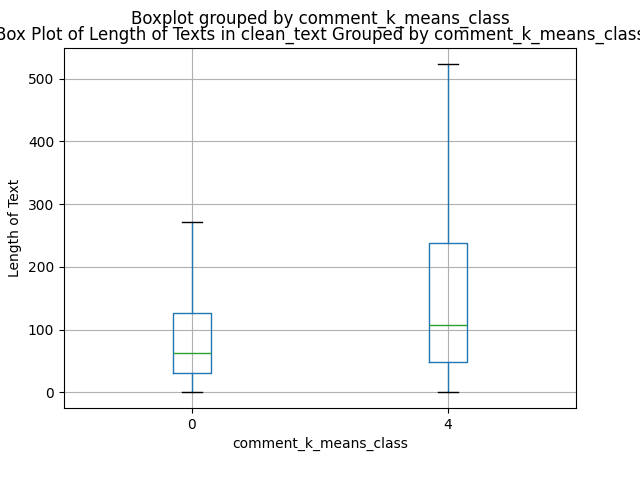

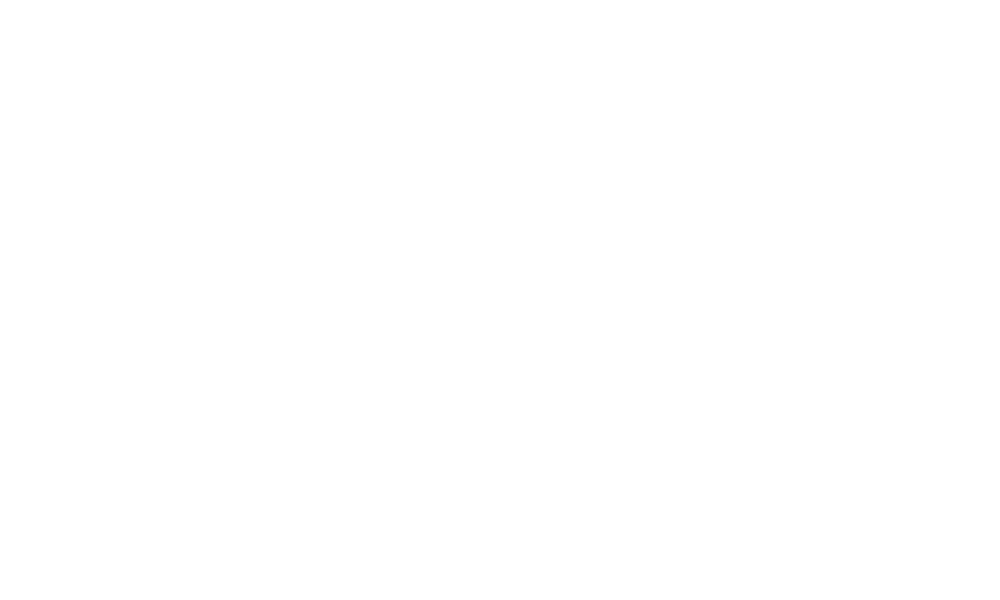

In [ ]:
# Cluster Analysis
plt.figure(figsize=(10, 6))
def get_text_length(text):
    if text is None:
        return np.NAN
    else:
        return len(text)
df['clean_text_length'] = df['clean_text'].apply(lambda x: get_text_length(x))
df.boxplot(column='clean_text_length', by='comment_k_means_class', showfliers=False)
plt.xlabel('comment_k_means_class')
plt.ylabel('Length of Text')
plt.title('Box Plot of Length of Texts in clean_text Grouped by comment_k_means_class')
plt.show()

controversiality            0      1
comment_k_means_class               
0                      806830  69485
4                      638406  32765


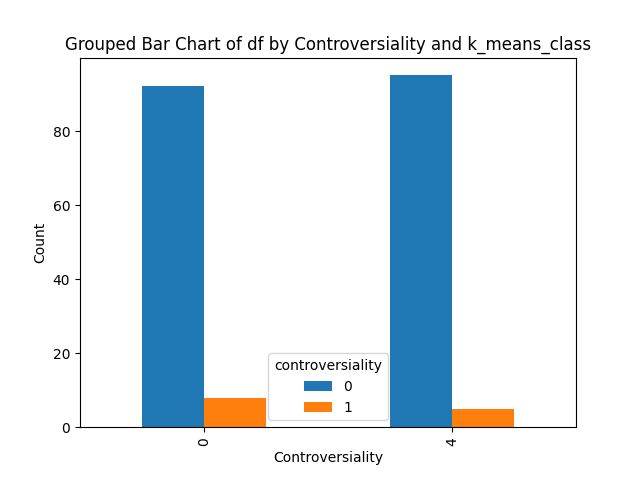

In [ ]:
# Cluster Analysis

df_grouped = df.groupby(['comment_k_means_class','controversiality']).size().unstack()
df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
df_grouped_percentage.plot(kind='bar', stacked=False)
print(df_grouped)
plt.xlabel('Controversiality')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of df by Controversiality and k_means_class')

plt.show()

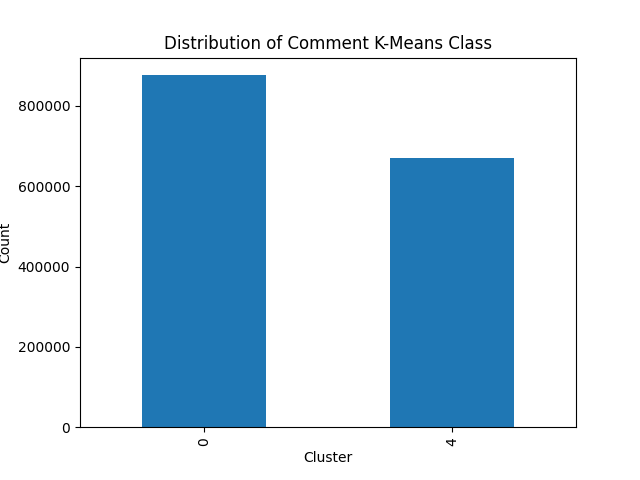

In [ ]:
# Cluster Analysis

df['comment_k_means_class'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Comment K-Means Class')
plt.show()

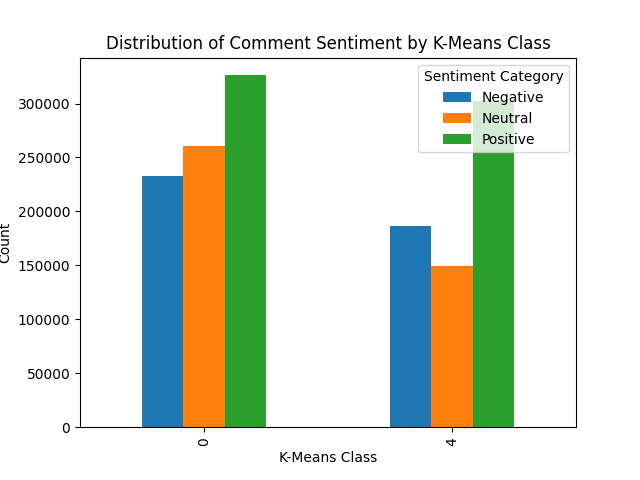

In [ ]:
# K-Means Cluster analysis
df.groupby('comment_k_means_class')['comment_tb_cat'].value_counts().unstack().plot(kind='bar')
plt.xlabel('K-Means Class')
plt.ylabel('Count')
plt.title('Distribution of Comment Sentiment by K-Means Class')
plt.legend(title='Sentiment Category')
plt.show()

## Bypass

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
from scipy.sparse import lil_matrix, csr_matrix
small_tfidf_matrix = tfidf_matrix[:1000]
# Step 1: Create a sparse matrix of ones with the same shape as tfidf_matrix

# Step 2: Perform the subtraction
t = tfidf_matrix[[1,2,3]]
dt = {0: tfidf_matrix[0], 1: tfidf_matrix[1], 2: tfidf_matrix[2]}
dtm = scipy.sparse.vstack(list(dt.values()))
dtm.shape

(3, 1000)

In [ ]:
dot_prod = small_tfidf_matrix.dot(t.T)
ones_matrix = lil_matrix(dot_prod.shape)
ones_matrix[:] = 1  # Set all values to 1
ones_matrix = ones_matrix.tocsr()  # Convert to CSR format for efficient arithmetic
subtracted_matrix = ones_matrix - dot_prod

# Step 3: Multiply by 2
dmat = 2 * subtracted_matrix

# Check the shape
print(dmat.shape)
classes = np.argmin(dmat, axis=1)


In [ ]:
small_tfidf_matrix.dot(t.T).shape

(1000, 3)

In [ ]:
# Bypass
k = 10
random_indices = np.random.choice(tfidf_matrix.shape[0], k, replace=False)
c = {}
for i, index in enumerate(random_indices):
    c[i] = tfidf_matrix[index]
print("Initialize fitting with " + str(k) + " centroids")
print([type(c[t]) for t in c.keys()])
sparse_matrix = tfidf_matrix[random_indices]
del c, sparse_matrix

Initialize fitting with 10 centroids
[<class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>, <class 'scipy.sparse._csr.csr_matrix'>]


In [ ]:
print(tfidf_matrix.shape)
print(tfidf_matrix[1].shape

(1547479, 327551)
(327551, 1)


In [ ]:
tfidf_matrix.dot(tfidf_matrix[0].T).toarray()

array([[1.        ],
       [0.        ],
       [0.34432752],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
km = KMeans(k = 5, max_iterations=100)
km.fit(tfidf_matrix)

Random Indices Generated


0it [00:00, ?it/s]

Initialize fitting with 5 centroids


  0%|          | 0/100 [00:00<?, ?it/s]

Beginning iteration 0 of the K-Means algorithm...
Generating cosine distance matrix
Cosine distance matrix generated


  0%|          | 0/5 [00:00<?, ?it/s]

Class Value: 0
Class Value: 1
Class Value: 2
Class Value: 3
Class Value: 4
At iteration 0, centroid: 0
> c:\users\tomar\appdata\local\temp\ipykernel_24236\3455047276.py(36)get_cosine_distance()

*** NameError: name 'curr' is not defined
*** NameError: name 'curr' is not defined
a = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 96 stored elements and shape (1, 1000)>
b = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 1000)>
trace = True
a = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 96 stored elements and shape (1, 1000)>
b = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 1000)>
trace = True
a = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 96 stored elements and shape (1, 1000)>
b = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 1000)>
trace = True
a = <Compressed Sparse Row sparse matrix of dtype

In [ ]:
idx = 877
dot_product(tfidf_matrix[idx], tfidf_matrix[idx])

0.0

In [ ]:
cosine_similarity(tfidf_matrix[0], tfidf_matrix[99])

0.0

In [ ]:

X_sm = sm.add_constant(lda_topic_matrix)  # Adding a constant for intercept

logit_model = sm.Logit(y, X_sm)
result = logit_model.fit(maxiter=100)

# Display the summary which includes p-values and other statistical measures
print(result.summary())


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(lda_topic_matrix, y, test_size=0.2, random_state=42)
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5440342298288509


In [ ]:
# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic
# Number of words for each topic
no_words_per_topic = 10
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-no_words_per_topic - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Print the topics and related words
for topic_idx, top_words in enumerate(top_words_per_topic):
    print(f"Topic {topic_idx + 1}:")
    print(", ".join(top_words))
    print()

In [ ]:
query = 'Israel and Palestine should not fight'
df.count()

Unnamed: 0                    1547486
comment_id                    1547486
score                         1547486
self_text                     1547486
subreddit                     1547486
created_time                  1547486
post_id                       1547486
author_name                   1547486
controversiality              1547486
ups                           1547486
downs                         1547486
user_is_verified              1547486
user_account_created_time     1485603
user_awardee_karma            1547271
user_awarder_karma            1547271
user_link_karma               1547271
user_comment_karma            1547271
user_total_karma              1547271
post_score                    1547486
post_self_text                 686307
post_title                    1547486
post_upvote_ratio             1547486
post_thumbs_ups               1547486
post_total_awards_received    1547486
post_created_time             1547486
clean_text                    1532787
clean_post_s

In [ ]:
# Get the vocabulary indices for 'israel' and 'palestine' in your vectorizer
israel_word_index = vectorizer.vocabulary_['israel']
palestine_word_index = vectorizer.vocabulary_['palestine']

In [ ]:
topic_term_distribution = lda_model.components_
israel_topic_index = topic_term_distribution[:, israel_word_index].argmax()
palestine_topic_index = topic_term_distribution[:, palestine_word_index].argmax()

In [ ]:
print(f"The topic related with 'israel' is Topic {israel_topic_index + 1}:")
print(", ".join(top_words_per_topic[israel_topic_index]))
print()

# Print the topics related with 'palestine'
print(f"The topic related with 'palestine' is Topic {palestine_topic_index + 1}:")
print(", ".join(top_words_per_topic[palestine_topic_index]))
print()

The topic related with 'israel' is Topic 6:
israel, jews, palestinians, people, state, like, just, jewish, land, right

The topic related with 'palestine' is Topic 6:
israel, jews, palestinians, people, state, like, just, jewish, land, right

